# <center>Exploratory Data Analysis on Superstore

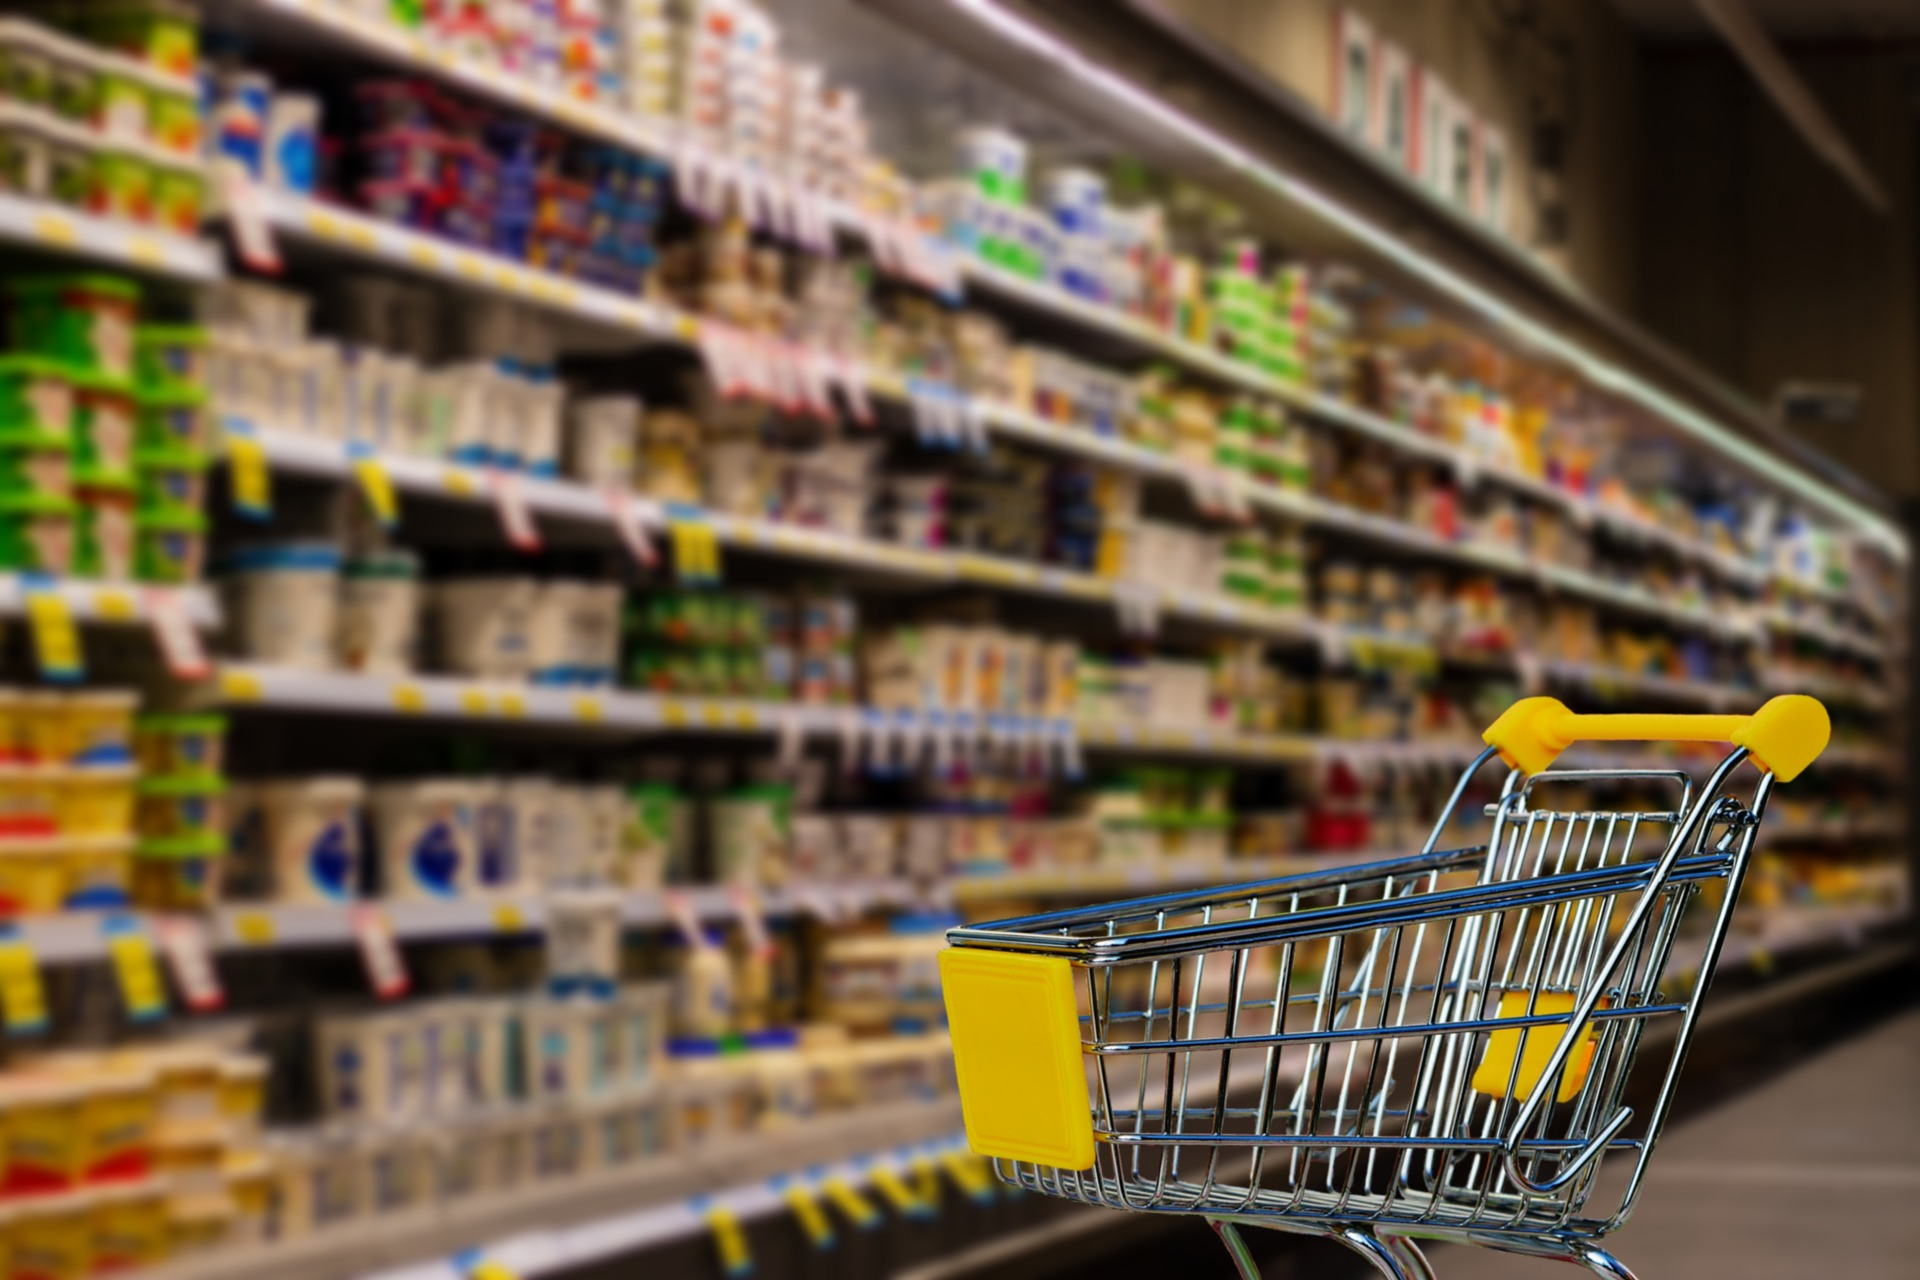

### Table of Contents
1. [Introduction](#1.-Introduction)
2. [Business Task](#2.-Business-Task)
3. [Examining Dataset](#3.-Examining-Dataset)
4. [Descriptive Statistics](#4.-Descriptive-Statistics)
5. [Data Cleaning](#5.-Data-Cleaning)
6. [Sales and Profit Summary](#6.-Sales-and-Profit-Summary)
7. [Product Analysis](#7.-Product-Analysis)
8. [Segment Analysis](#8.-Segment-Analysis)
9. [Geographic Analysis](#9.-Geographic-Analysis)
10. [Customer Analysis](#10.-Customer-Analysis)
11. [Shipping Mode Analysis](#11.-Shipping-Mode-Analysis)
12. [Findings and Recommendations](#12.-Findings-and-Recommendations)

## 1. Introduction
<b>Superstore</b> is a small retail business operating in the United States. They sell Furniture, Office Supplies, and Technology products to Consumer, Corporate, and Home Office customers.

## 2. Business Task
Relying on gut feelings and assumptions has always been an unsustainable strategy for any business. Data-driven decision-making provides businesses with the capability to generate real-time insights and predictions to optimize their performance. Through this, they can test the success of different strategies and make informed business decisions for sustainable growth.

Considering the importance of the data-driven decisions, <b>Superstore</b> wants to analyze its data and make data-driven business decisions in order to maximize its sales and profit. Our task is to explore, clean, and analyze the data and present the findings to <b>Superstore</b>'s management.

In [1]:
# Import the required libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import missingno as msno

plt.style.use('fivethirtyeight')

In [2]:
# For displaying all of the columns and rows in dataframes
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# Loading the dataset
superstore = pd.read_excel(r'C:\Users\Mohammed Nafrees\Datasets\super_store.xls')

## 3. Examining Dataset

In [4]:
# Displaying first 3 rows of the dataframe
superstore.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [5]:
# Shape of dataset
superstore.shape

(9994, 20)

In [6]:
# Basic information about the dataset
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

In [7]:
# Showing counts of unique values in the 'Segment' column
superstore['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [8]:
# Showing counts of unique values in the 'Category' column
superstore['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [9]:
# Showing unique values in the 'Sub-Category' column
superstore['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

## 4. Descriptive Statistics

In [10]:
# # Descriptive statistic summary of numeric variables
superstore.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


## 5. Data Cleaning

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


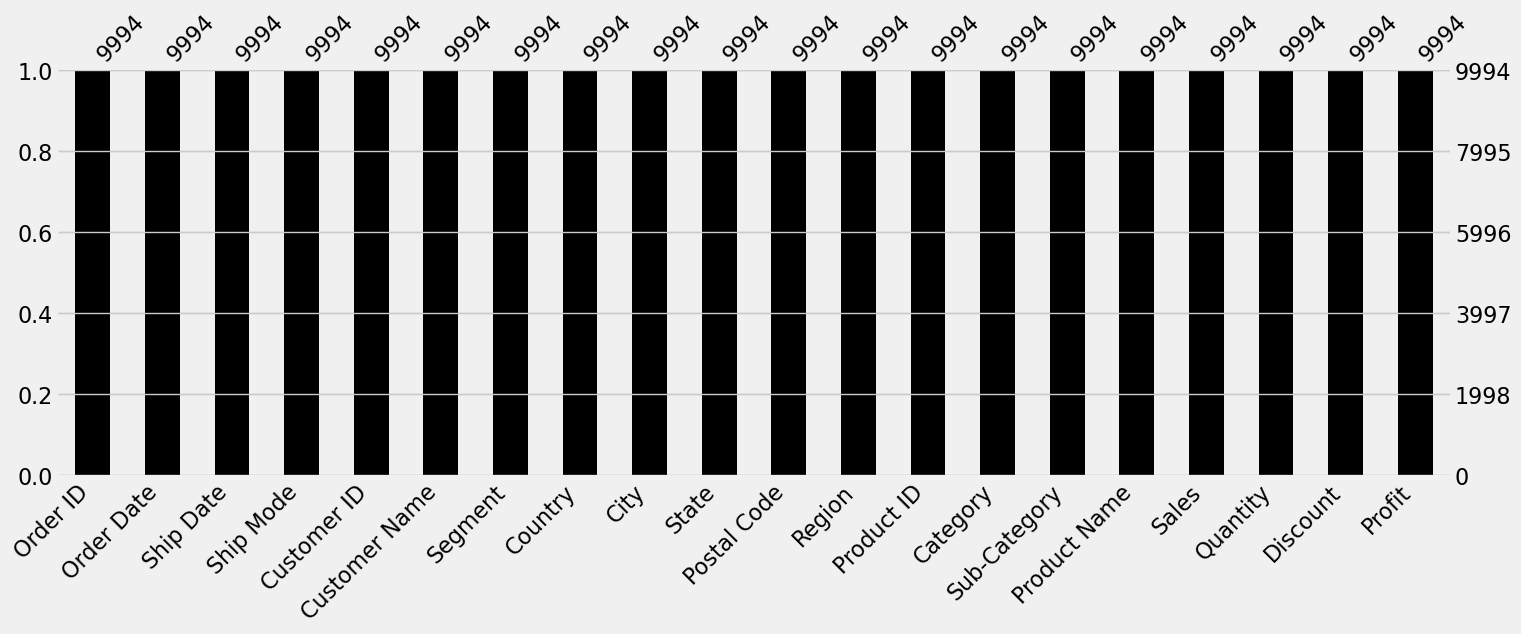

In [11]:
# Checking for missing values
print(superstore.isna().sum())

# Visualizing missing values
msno.bar(superstore, figsize = (16,5),color = "black")
plt.show()

There are no missing values in this dataset.

In [12]:
# Find the number of duplicate data
superstore.duplicated().sum()

1

There is 1 duplicate row in the dataset.

In [13]:
# Show the duplicated row
superstore[superstore.duplicated(keep = 'last')]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3405,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [14]:
# Changing column names' letters to lowercases and replacing spaces and hyphens with underscores
superstore.rename(columns= lambda x: x.lower().replace(' ', '_').replace('-', '_'), inplace = True)

In [15]:
# Creating a new column for shipping days and profit margin
superstore['ship_days']=(superstore['ship_date']-superstore['order_date']).dt.days

# Creating a new column by extracting day name of the week from the 'order_date' column
superstore['day_name']=superstore['order_date'].dt.day_name()

# Creating a new column by extracting quarter from the 'order_date' column
superstore['quarter']=superstore['order_date'].dt.to_period('Q').dt.strftime('Q%q')

# Creating a new column by extracting month name from the 'order_date' column
superstore['month']=superstore['order_date'].dt.strftime('%m')

# Creating a new column by extracting year from the 'order_date' column
superstore['year']=superstore['order_date'].dt.strftime('%Y')

# Creating a new column by extracting year and quarter from the 'order_date' column
superstore['year_quarter']=superstore['order_date'].dt.to_period('Q').dt.strftime('%Y-Q%q')

## 6. Sales and Profit Summary

In [16]:
sp_year = superstore.groupby('year')[['sales', 'profit']].sum().reset_index()
sp_month = superstore.groupby('month')[['sales', 'profit']].sum().reset_index()
sp_year_quarter = superstore.groupby('year_quarter')[['sales', 'profit']].sum().reset_index()
sp_quarter = superstore.groupby('quarter')[['sales', 'profit']].sum().reset_index()

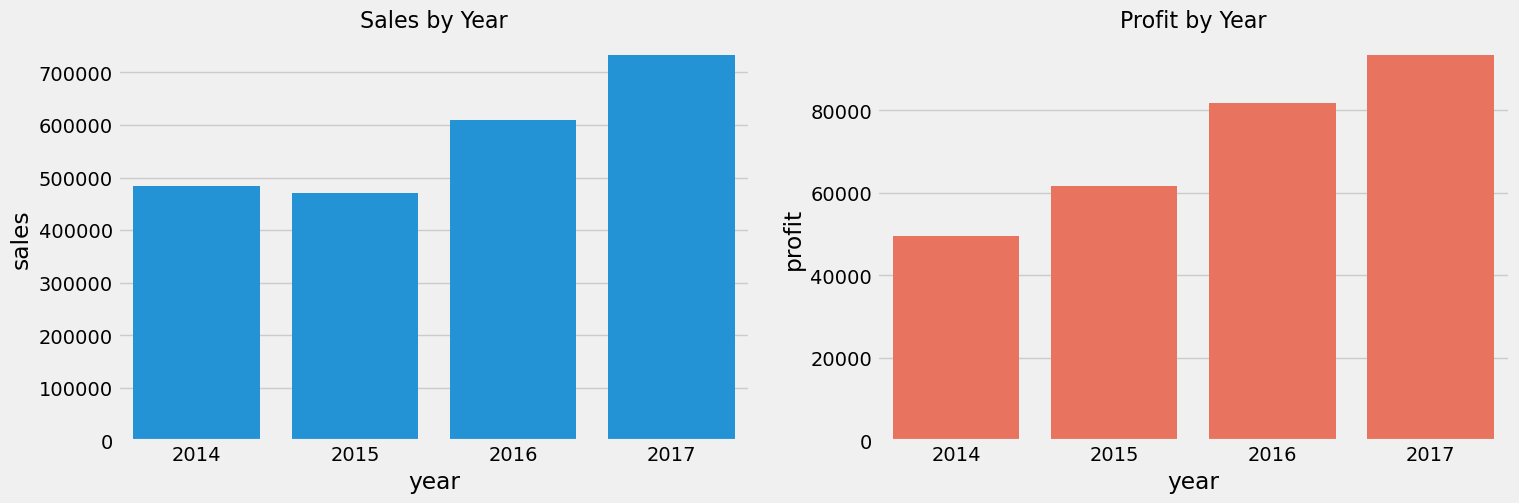

In [57]:
figure, axis = plt.subplots(1, 2, figsize=(16, 5))
sns.barplot(sp_year, x='year', y='sales', color='#069AF3', ax=axis[0])
axis[0].set_title('Sales by Year', fontsize=16)

sns.barplot(sp_year, x='year', y='profit', color='#FF6347', ax=axis[1])
axis[1].set_title('Profit by Year', fontsize=16)

plt.show()

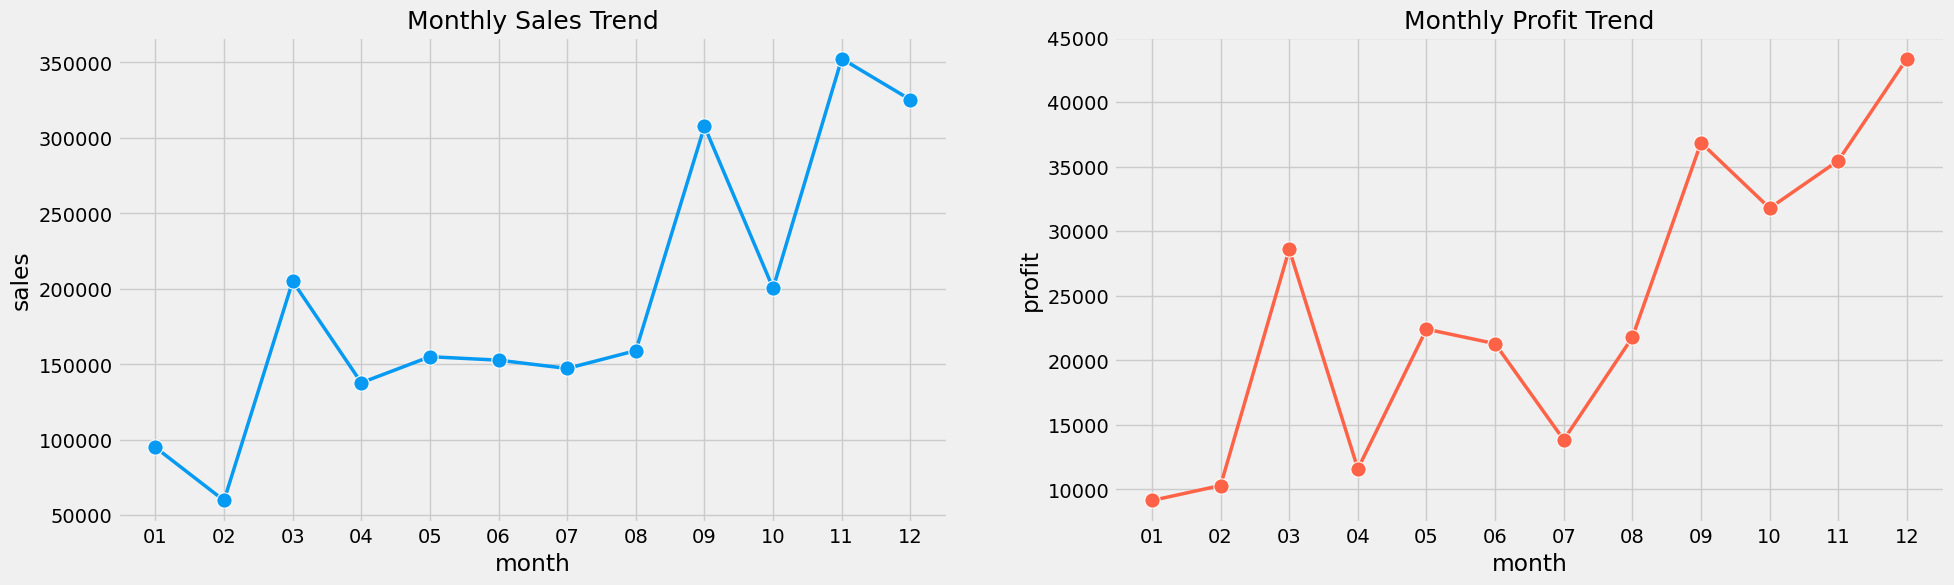

In [54]:
figure, axis = plt.subplots(1, 2, figsize=(21, 6))
sns.lineplot(sp_month, x='month', y='sales', color='#069AF3', lw=2.5, marker='o',
             markersize=11,  ax=axis[0])
axis[0].set_title('Monthly Sales Trend', fontsize=18)

sns.lineplot(sp_month, x='month', y='profit', color='#FF6347', lw=2.5, marker='o',
             markersize=11, ax=axis[1])
axis[1].set_title('Monthly Profit Trend', fontsize=18)

plt.show()

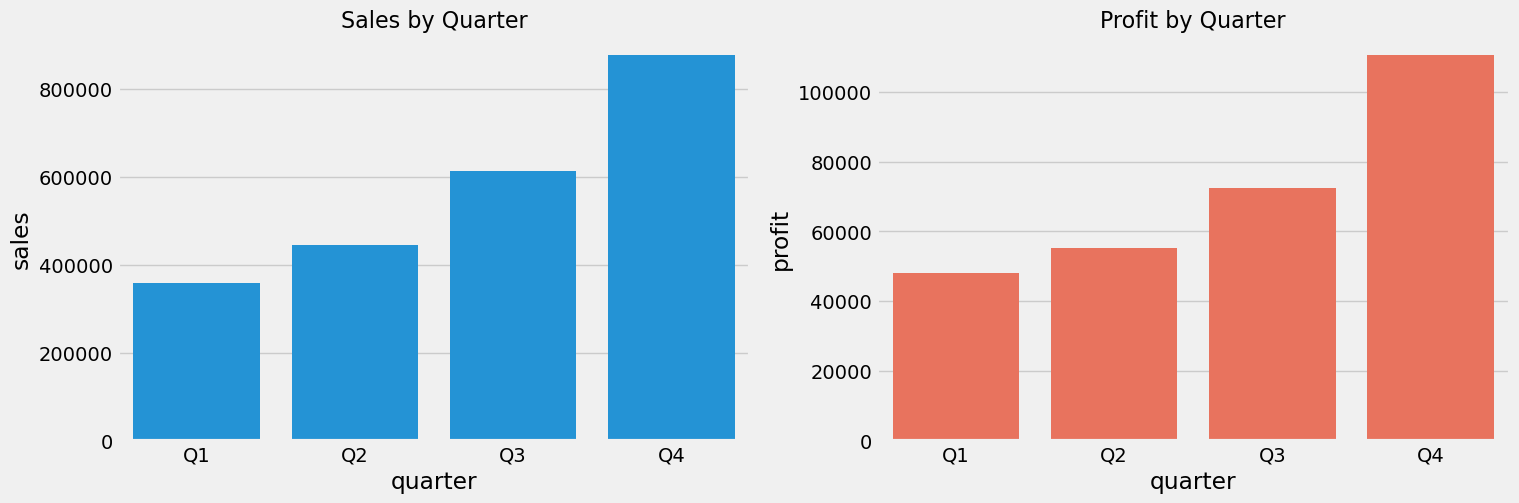

In [55]:
figure, axis = plt.subplots(1, 2, figsize=(16, 5))
sns.barplot(sp_quarter, x='quarter', y='sales', color='#069AF3', ax=axis[0])
axis[0].set_title('Sales by Quarter', fontsize=16)

sns.barplot(sp_quarter, x='quarter', y='profit', color='#FF6347', ax=axis[1])
axis[1].set_title('Profit by Quarter', fontsize=16)

plt.show()

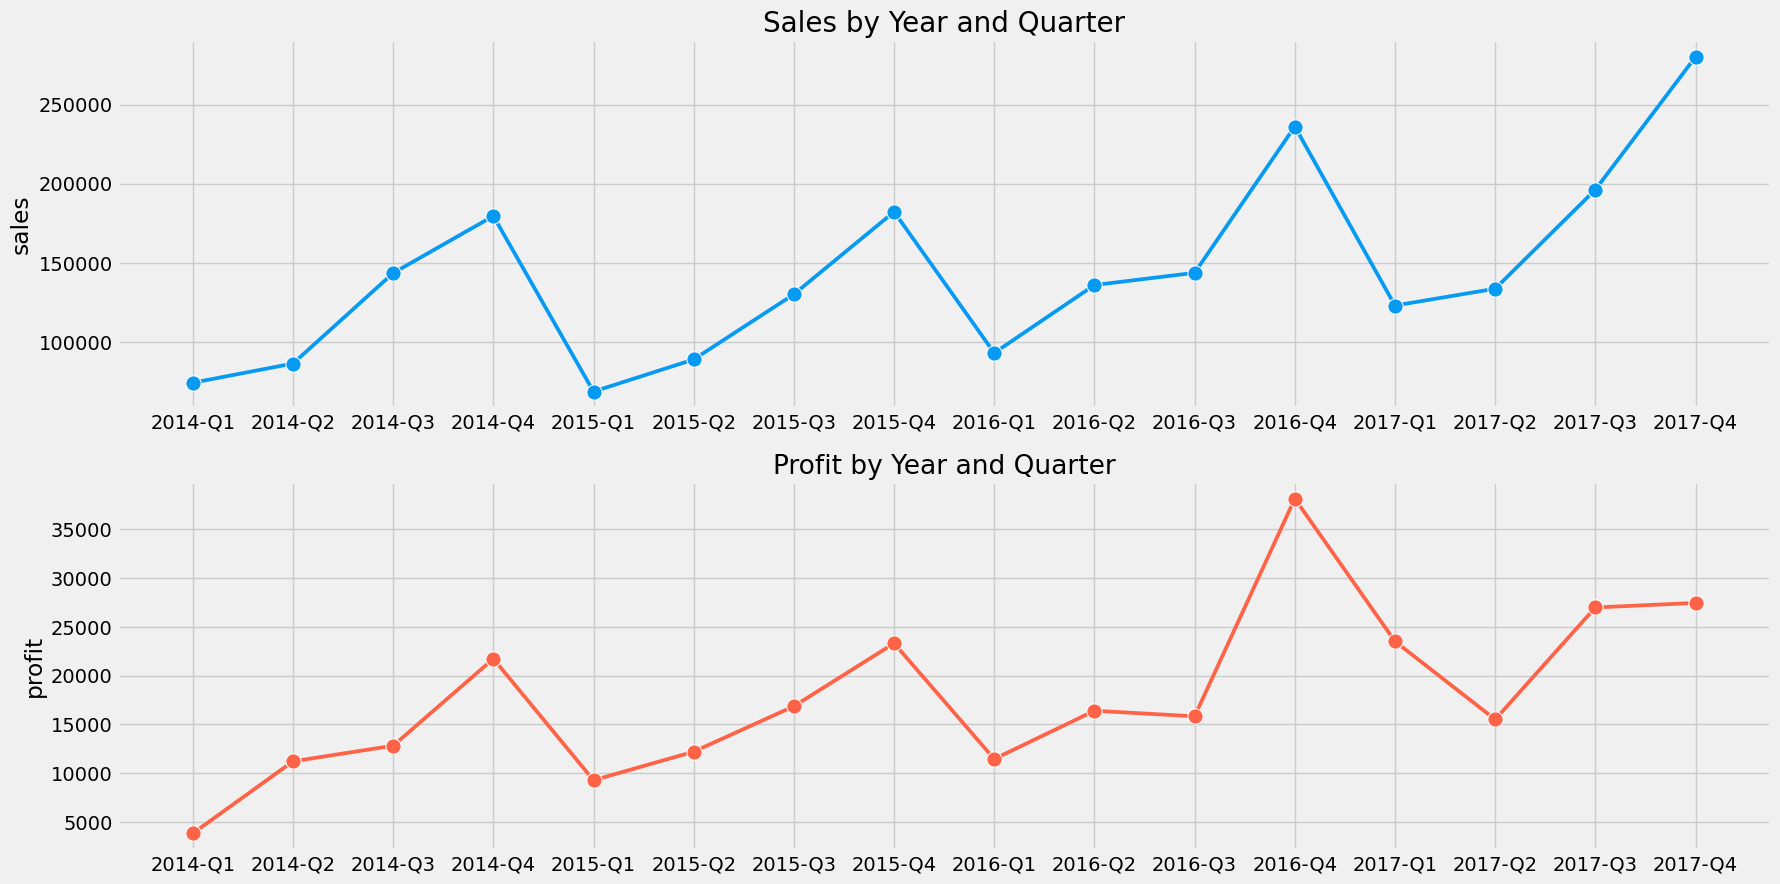

In [56]:
plt.figure(figsize=(19, 10))
plt.subplot(2, 1, 1)
ax=sns.lineplot(sp_year_quarter, x='year_quarter', y='sales', color='#069AF3', lw=2.7, 
                marker='o',  markersize=11)
ax.set(xlabel=None)
ax.set_title('Sales by Year and Quarter', fontsize=20)

plt.subplot(2, 1, 2)
ax=sns.lineplot(sp_year_quarter, x='year_quarter', y='profit', color='#FF6347', lw=2.7, 
                marker='o',  markersize=11)
ax.set(xlabel=None)
ax.set_title('Profit by Year and Quarter', fontsize=19)

plt.show()

## 7. Product Analysis

In [21]:
c_analysis=superstore.groupby('category')[['sales', 'profit', 'quantity']].sum().reset_index()
c_analysis

,category,sales,profit,quantity
0,Furniture,741999.7953,18451.2728,8028
1,Office Supplies,719047.0320,122490.8008,22906
2,Technology,836154.0330,145454.9481,6939


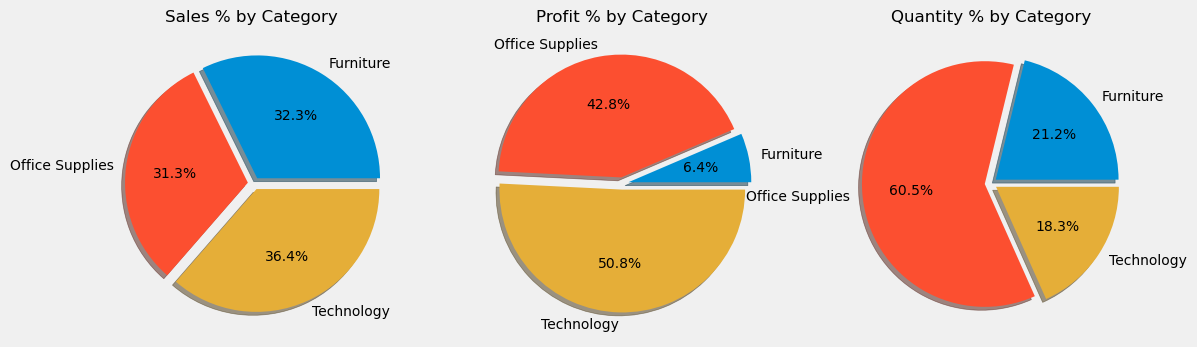

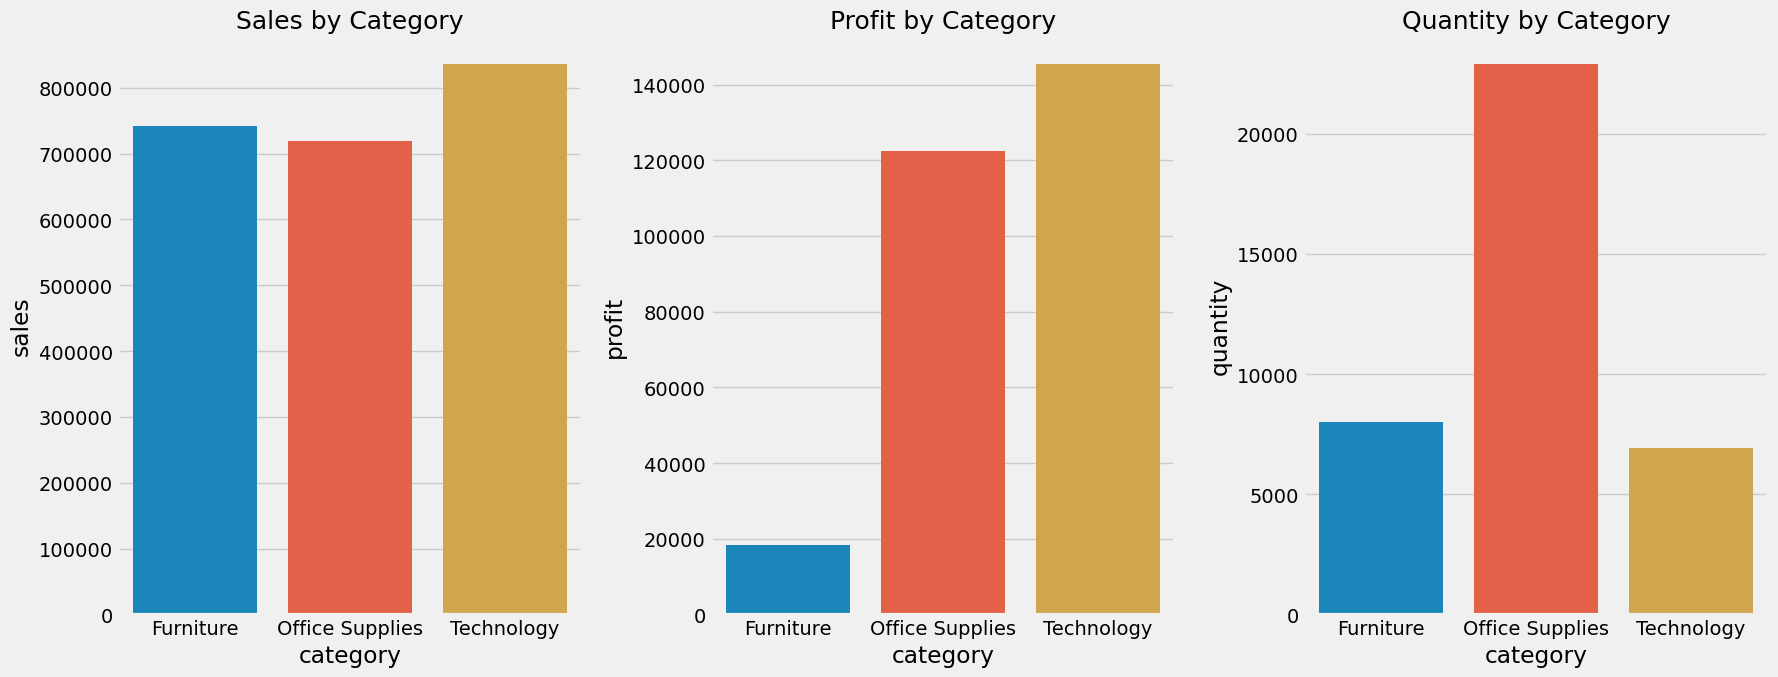

In [22]:
fig = plt.figure(figsize=(12,10))
ax = plt.subplot2grid((1,3),(0,0))
plt.pie(data=c_analysis, x='sales', labels='category', autopct='%.1f%%', shadow=True, explode=[0.05, 0.05, 0.05],
        textprops={'fontsize': 10})
plt.title('Sales % by Category ', fontsize=12)

#first row sec column
ax = plt.subplot2grid((1,3), (0, 1))
plt.pie(data=c_analysis, x='profit', labels='category',autopct='%.1f%%', shadow=True, 
        explode=[0.05, 0.05, 0.05], textprops={'fontsize': 10} )
plt.title('Profit % by Category', fontsize=12)

ax = plt.subplot2grid((1,3), (0, 2))
plt.pie(data=c_analysis, x='quantity', labels='category',autopct='%.1f%%', shadow=True, 
        explode=[0.05, 0.05, 0.05], textprops={'fontsize': 10} )
plt.title('Quantity % by Category', fontsize=12)


figure, axis = plt.subplots(1, 3, figsize=(18, 7))
# Seaborn palette setting

# Plot barplots
sns.barplot(data=c_analysis, x='category', y='sales', ax=axis[0])
axis[0].set_title('Sales by Category', fontsize=18)

sns.barplot(data=c_analysis, x='category', y='profit', ax=axis[1])
axis[1].set_title('Profit by Category', fontsize=18)

sns.barplot(data=c_analysis, x='category', y='quantity', ax=axis[2])
axis[2].set_title('Quantity by Category', fontsize=18)

plt.tight_layout()

### Observation
- Sales are divided almost equally between the three product categories. But compared to Technology and Office Supplies, profit margin on Furniture is quite low.
- Technology is the best selling and most profitable category.
- In terms of quantity, Office Supplies sells the most, followed by furniture and technology.

In [23]:
c_trend_year=superstore.groupby(['year', 'category'])[['sales', 'profit']].sum().astype('int').reset_index()
print(pd.pivot_table(c_trend_year.iloc[:, 0:3], index='category', columns='year'))
print(pd.pivot_table(c_trend_year.iloc[:, [0, 1, 3]], index='category', columns='year'))

                  sales                        
year               2014    2015    2016    2017
category                                       
Furniture        157192  170518  198901  215387
Office Supplies  151776  137233  183939  246097
Technology       175278  162780  226364  271730
                profit                     
year              2014   2015   2016   2017
category                                   
Furniture         5457   3015   6959   3018
Office Supplies  22593  25099  35061  39736
Technology       21492  33503  39773  50684


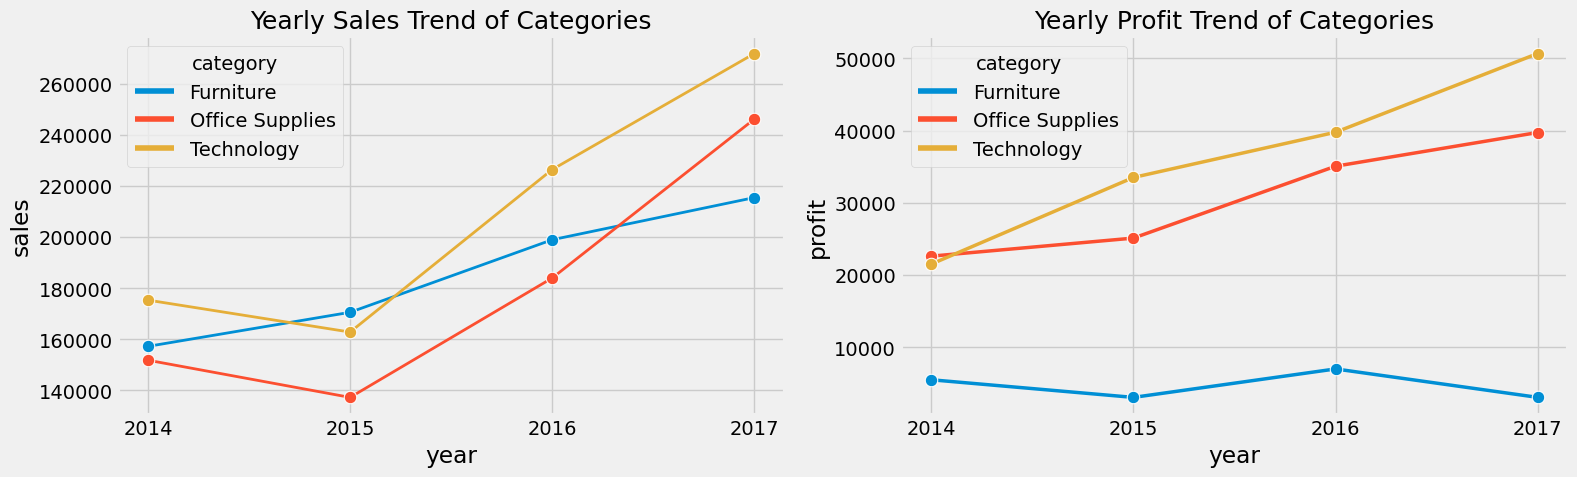

In [69]:
figure, axis = plt.subplots(1, 2, figsize=(16, 5))
sns.lineplot(c_trend_year, x='year', y='sales', hue='category', errorbar=None, marker='o',
            markersize=9, lw=2, ax=axis[0])
axis[0].set_title('Yearly Sales Trend of Categories', fontsize=18)
sns.lineplot(c_trend_year, x='year', y='profit', hue='category', errorbar=None, marker='o',
            markersize=9, lw=2.5, ax=axis[1])
axis[1].set_title('Yearly Profit Trend of Categories', fontsize=18)
plt.tight_layout()

### Observation
- Sales of Technology and Office Supplies decreased in 2015. However, sales increased dramatically in 2016 and 2017.
- Furniture sales increased steadily from 2014 to 2017.
- From 2014 to 2017, the profits from Technology and Office Supplies rose continuously, whereas those from Furniture fluctuated.

  sub_category      sales    profit  profit_margin%
0  Accessories  167380.32  41936.64           25.05
1      Copiers  149528.03  55617.82           37.20
2     Machines  189238.63   3384.76            1.79
3       Phones  330007.05  44515.73           13.49


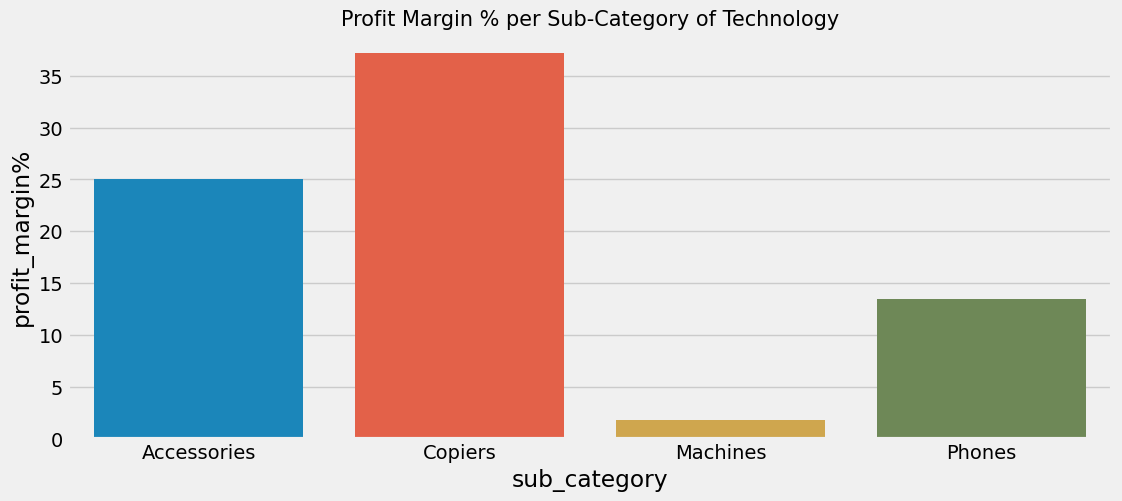

In [25]:
tech = superstore.query('category=="Technology"')
tech_analysis=tech.groupby('sub_category')[['sales', 'profit']].sum()
tech_analysis['profit_margin%'] = (tech_analysis['profit']/tech_analysis['sales'])*100
tech_analysis=tech_analysis.round(2).reset_index()
print(tech_analysis)

plt.figure(figsize=(12, 5))
sns.barplot(tech_analysis, x='sub_category', y='profit_margin%')
plt.title('Profit Margin % per Sub-Category of Technology', fontsize=15)
plt.show()

### Observation
- In Technology's sub-category, Copiers has the higest profit margin, followed by Accessories, Phones, and Machines.
- Machines has an extremely lower profit margin compared to other Technology's sub-categories.

In [26]:
tech_sc_year = tech.groupby(['year', 'sub_category'])[['sales', 'profit']].sum().round(2).reset_index()
print(pd.pivot_table(tech_sc_year.iloc[:, 0:3], index='sub_category', columns='year'))
print(pd.pivot_table(tech_sc_year.iloc[:, [0, 1, 3]], index='sub_category', columns='year'))

                 sales                               
year              2014      2015      2016       2017
sub_category                                         
Accessories   25014.27  40523.96  41895.85   59946.23
Copiers       10849.78  26179.45  49599.41   62899.39
Machines      62023.37  27763.70  55906.89   43544.68
Phones        77390.81  68313.70  78962.03  105340.52
                profit                              
year              2014      2015      2016      2017
sub_category                                        
Accessories    6402.72  10197.28   9664.29  15672.36
Copiers        2912.94   9930.30  17742.79  25031.79
Machines        369.17   2977.49   2907.32  -2869.22
Phones        11808.01  10398.81   9459.59  12849.32


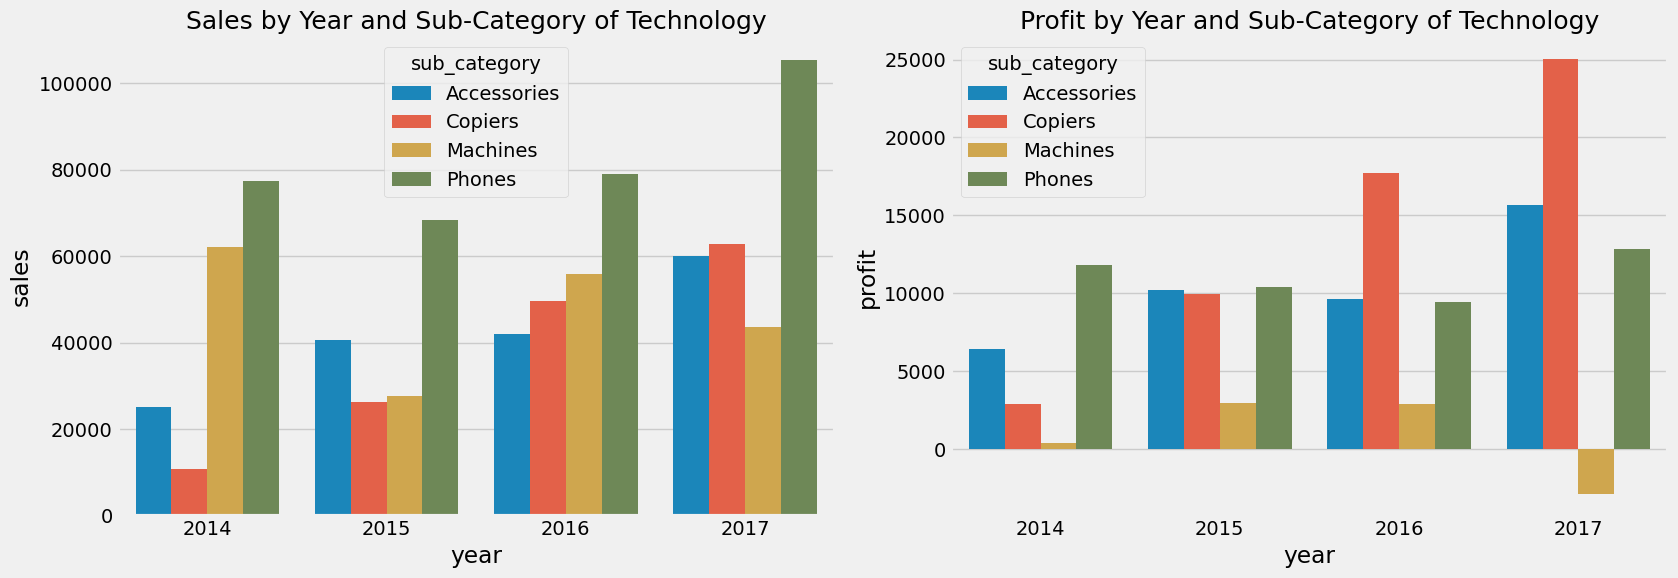

In [27]:
figure, axis = plt.subplots(1, 2, figsize=(17, 6))
sns.barplot(tech_sc_year, x='year', y='sales', hue='sub_category', ax=axis[0])
axis[0].set_title('Sales by Year and Sub-Category of Technology', fontsize=18)
sns.barplot(tech_sc_year, x='year', y='profit', hue='sub_category', ax=axis[1])
axis[1].set_title('Profit by Year and Sub-Category of Technology', fontsize=18)
plt.tight_layout()

### Observation
- Sales of Copiers and Accessories increased from 2014 to 2017, while sales of Machines fluctuated.
- Despite a decline in Phones sales in 2015, Phones continued to lead in terms of sales from 2014 to 2017.
- Profits from Copiers climbed dramatically from 2014 to 2017, and in 2016 and 2017, the profits from copiers almost doubled those from Phones.
- Profits from Accessories increased from 2014 to 2017.
- Machines earned much lower profit between 2014 and 2016 than the other Technology's sub-categories. And notably, Machines suffered a loss in 2017.

In [28]:
sc_analysis=superstore.groupby('sub_category')[['sales', 'profit']].sum().round(2).reset_index()
sc_analysis

,sub_category,sales,profit
0,Accessories,167380.32,41936.64
1,Appliances,107532.16,18138.01
2,Art,27118.79,6527.79
3,Binders,203412.73,30221.76
4,Bookcases,114880.00,-3472.56
5,Chairs,328449.10,26590.17
6,Copiers,149528.03,55617.82
7,Envelopes,16476.40,6964.18
8,Fasteners,3024.28,949.52
9,Furnishings,91705.16,13059.14


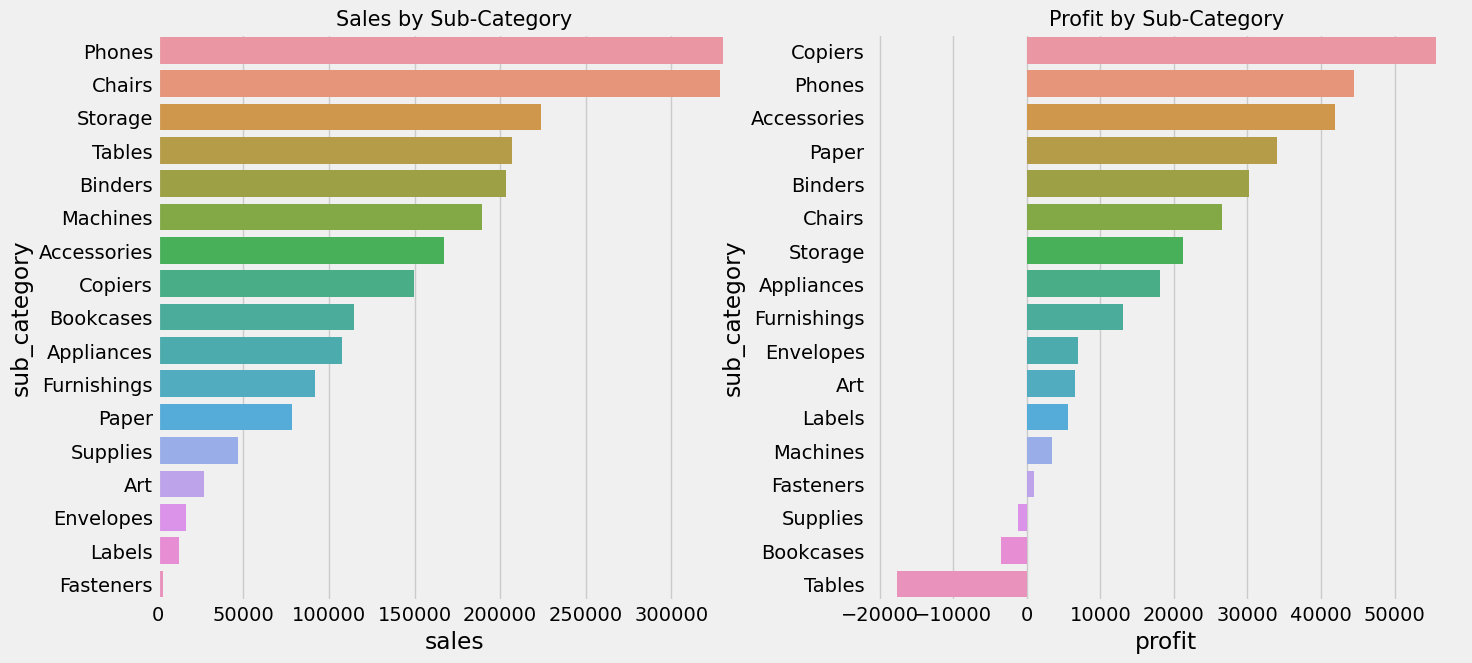

In [29]:
figure, axis = plt.subplots(1, 2, figsize=(15, 7))
sns.barplot(sc_analysis, x='sales', y='sub_category', 
            order=sc_analysis.sort_values('sales', ascending=False).sub_category, ax=axis[0])
axis[0].set_title('Sales by Sub-Category', fontsize=15)
sns.barplot(sc_analysis, x='profit', y='sub_category', 
            order=sc_analysis.sort_values('profit', ascending=False).sub_category, ax=axis[1])
axis[1].set_title('Profit by Sub-Category', fontsize=15)
plt.show()

### Observation
- The top 2 best selling sub-categories are Phones and Chairs.
- The most profitable sub-category is Copiers, followed by Phones, Accessories, Papers, and Binders.
- Losses are being made on Supplies, Bookcases, and Tables.

## 8. Segment Analysis

In [30]:
s_analysis=superstore.groupby('segment')[['sales', 'profit', 'quantity']].sum().round(2).reset_index()
s_analysis

,segment,sales,profit,quantity
0,Consumer,1161401.34,134119.21,19521
1,Corporate,706146.37,91979.13,11608
2,Home Office,429653.15,60298.68,6744


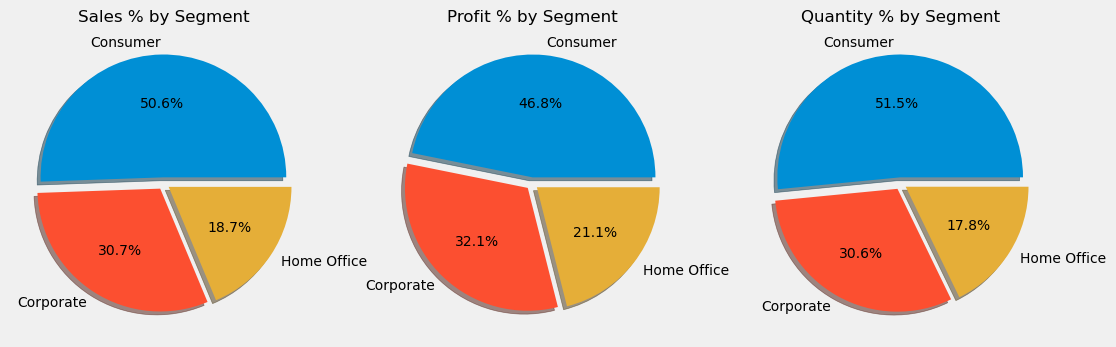

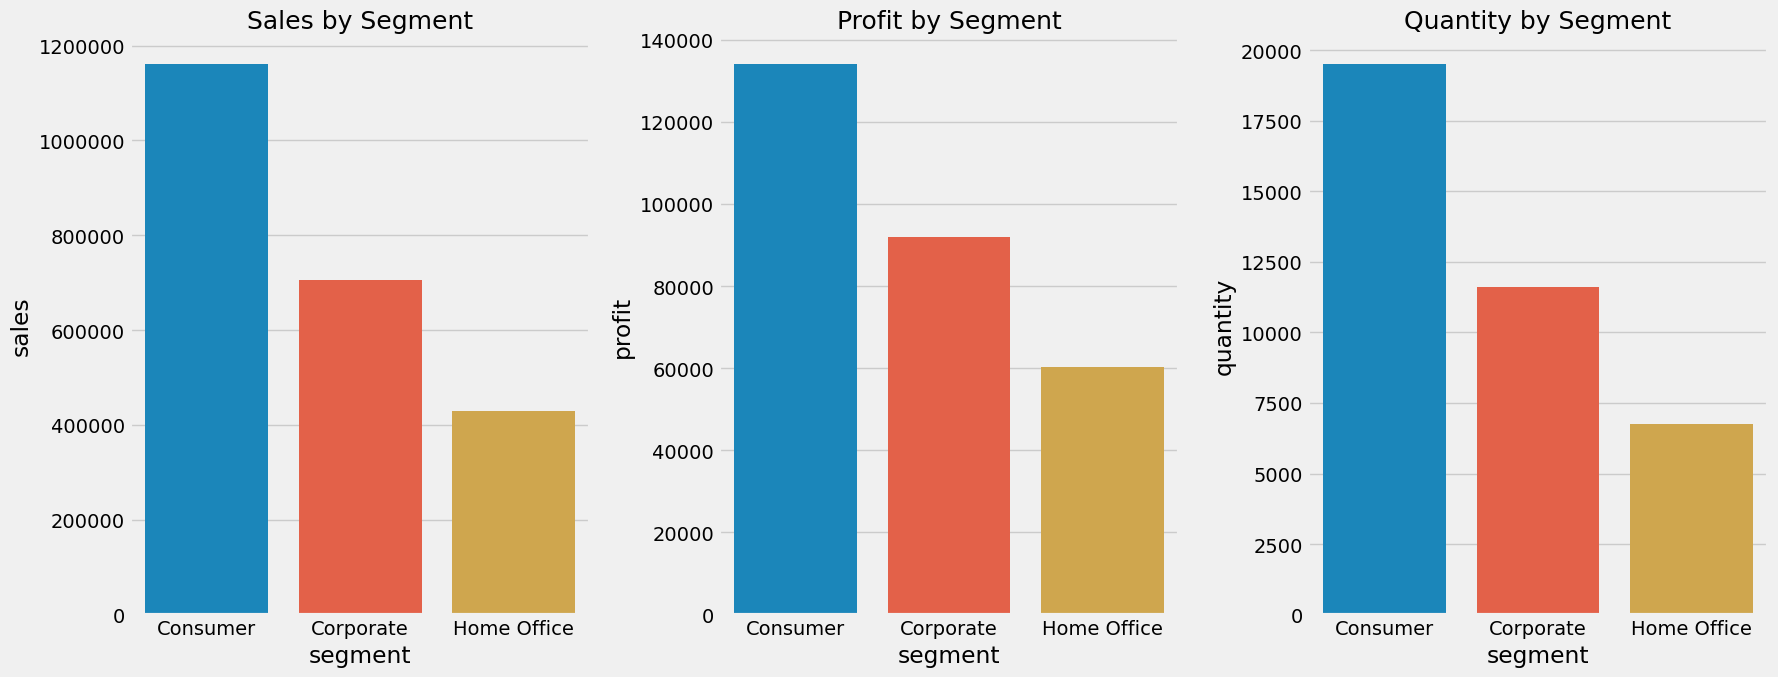

In [31]:
fig = plt.figure(figsize=(12, 10))
ax = plt.subplot2grid((1,3),(0,0))
plt.pie(data=s_analysis, x='sales', labels='segment', autopct='%.1f%%', shadow=True, explode=[0.05, 0.05, 0.05],
        textprops={'fontsize': 10})
plt.title('Sales % by Segment', fontsize=12)

#first row sec column
ax = plt.subplot2grid((1,3), (0, 1))
plt.pie(data=s_analysis, x='profit', labels='segment',autopct='%.1f%%', shadow=True, 
        explode=[0.05, 0.05, 0.05], textprops={'fontsize': 10} )
plt.title('Profit % by Segment', fontsize=12)

ax = plt.subplot2grid((1,3), (0, 2))
plt.pie(data=s_analysis, x='quantity', labels='segment',autopct='%.1f%%', shadow=True, 
        explode=[0.05, 0.05, 0.05], textprops={'fontsize': 10} )
plt.title('Quantity % by Segment', fontsize=12)


figure, axis = plt.subplots(1, 3, figsize=(18, 7))
# Seaborn palette setting

# Plot barplots
sns.barplot(data=s_analysis, x='segment', y='sales', ax=axis[0])
axis[0].ticklabel_format(axis='y', style='plain')
axis[0].set_title('Sales by Segment', fontsize=18)

sns.barplot(data=s_analysis, x='segment', y='profit', ax=axis[1])
axis[1].set_title('Profit by Segment', fontsize=18)

sns.barplot(data=s_analysis, x='segment', y='quantity', ax=axis[2])
axis[2].set_title('Quantity by Segment', fontsize=18)

plt.tight_layout()

### Observation
- In terms of sales, profit, and quantity, the Consumer segment was in the lead, followed by Corporate, and Home Office.

In [32]:
s_analysis=superstore.groupby(['segment', 'category'])[['sales', 'profit']].sum().round(2).reset_index()
print(pd.pivot_table(s_analysis.iloc[:, 0:3], index='segment', columns='category'))
print(pd.pivot_table(s_analysis.iloc[:, [0, 1, 3]], index='segment', columns='category'))

                 sales                           
category     Furniture Office Supplies Technology
segment                                          
Consumer     391049.31       363952.14  406399.90
Corporate    229019.79       230676.46  246450.12
Home Office  121930.70       124418.43  183304.02
               profit                           
category    Furniture Office Supplies Technology
segment                                         
Consumer      6991.08        56330.32   70797.81
Corporate     7584.82        40227.32   44167.00
Home Office   3875.38        25933.16   30490.14


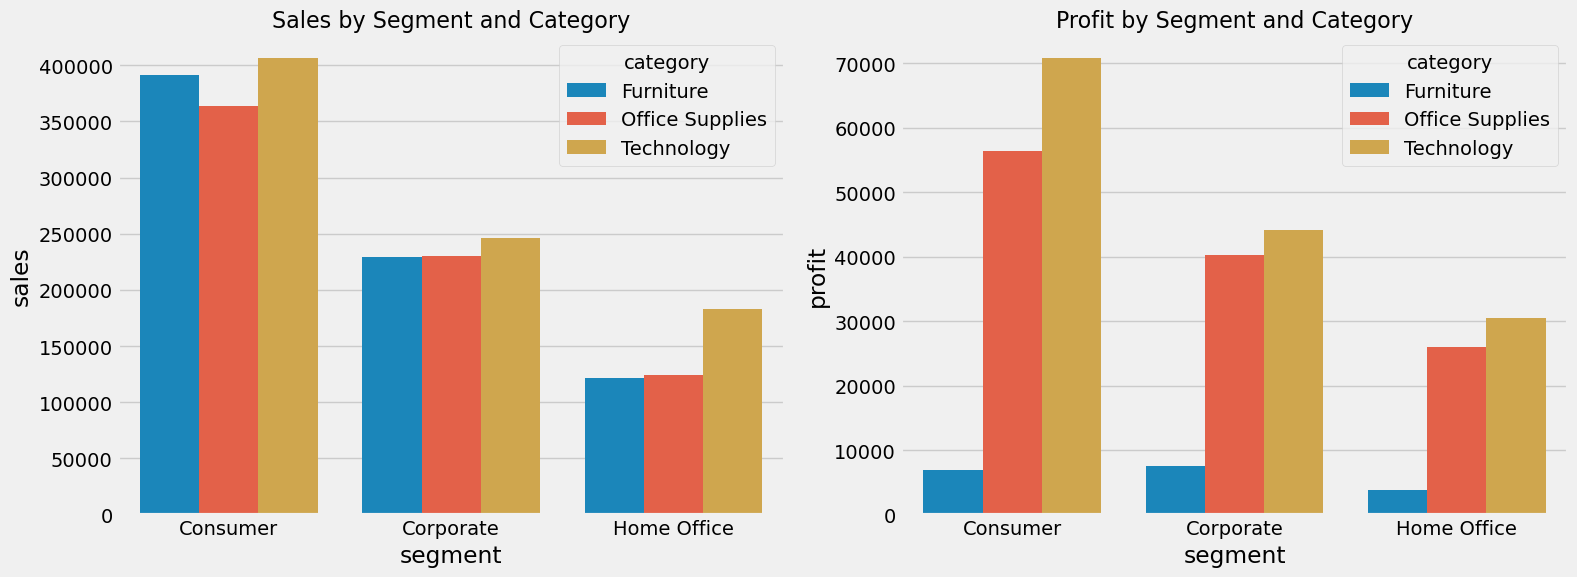

In [33]:
figure, axis = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(s_analysis, x='segment', y='sales', hue='category', ax=axis[0])
axis[0].set_title('Sales by Segment and Category', fontsize=16)

sns.barplot(s_analysis, x='segment', y='profit', hue='category', ax=axis[1])
axis[1].set_title('Profit by Segment and Category', fontsize=16)

plt.tight_layout()

### Observation
- Technology is the best selling and most profitable category in all three segments.

In [34]:
s_trend_year=superstore.groupby(['year', 'segment'])[['sales', 'profit']].sum().round(2).reset_index()
print(pd.pivot_table(s_trend_year.iloc[:, 0:3], index='segment', columns='year'))
print(pd.pivot_table(s_trend_year.iloc[:, [0, 1, 3]], index='segment', columns='year'))

                 sales                                 
year              2014       2015       2016       2017
segment                                                
Consumer     266096.81  266535.93  296863.90  331904.70
Corporate    128434.87  128757.31  207106.36  241847.82
Home Office   89715.81   75239.27  105235.34  159462.73
               profit                              
year             2014      2015      2016      2017
segment                                            
Consumer     24319.85  28460.17  35770.95  45568.24
Corporate    13513.28  20688.32  30995.17  26782.36
Home Office  11710.85  12470.11  15029.05  21088.67


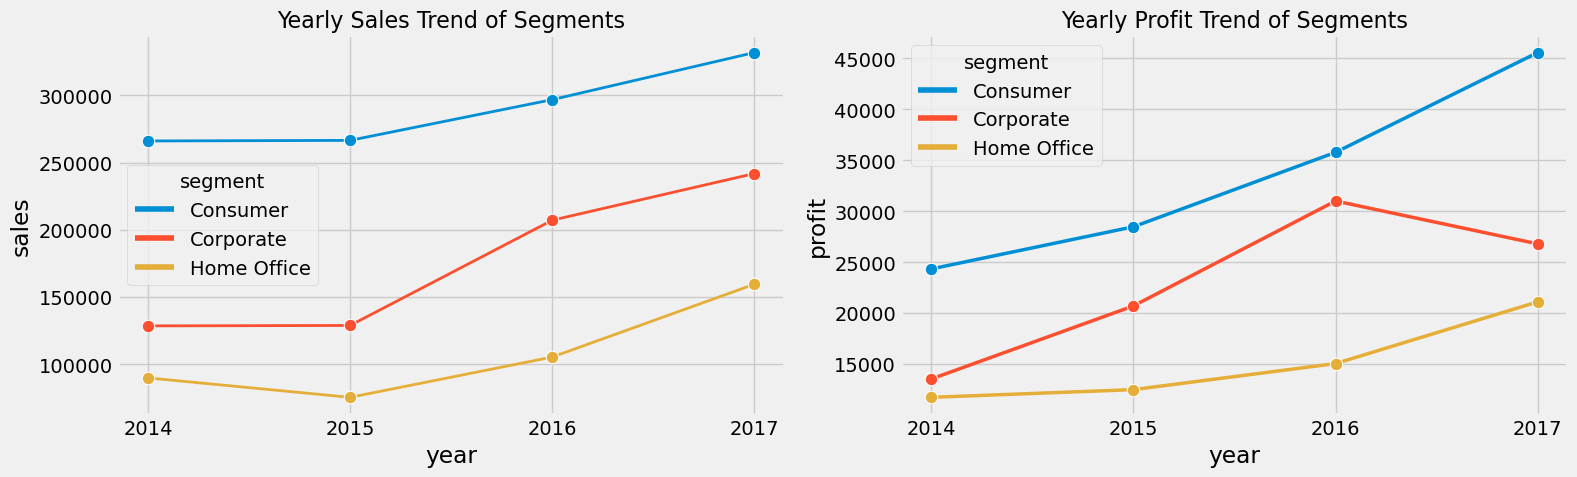

In [70]:
figure, axis = plt.subplots(1, 2, figsize=(16, 5))
sns.lineplot(s_trend_year, x='year', y='sales', hue='segment', errorbar=None, marker='o',
            markersize=9, lw=2, ax=axis[0])
axis[0].set_title('Yearly Sales Trend of Segments', fontsize=16)
sns.lineplot(s_trend_year, x='year', y='profit', hue='segment', errorbar=None, marker='o',
            markersize=9, lw=2.5, ax=axis[1])
axis[1].set_title('Yearly Profit Trend of Segments', fontsize=16)

plt.tight_layout()

### Observation
- Consumer and corporate sales almost remained constant in 2014 and 2015, while home office sales decreased. But in 2016 and 2017, sales rose continuously in all three segments.
- Profits from the consumer and home office segments increased significantly between 2014 and 2017.
- The corporate segment's profits rose significantly from 2014 to 2016, but fell in 2017.

## 9. Geographic Analysis

In [36]:
r_analysis=superstore.groupby('region')[['sales', 'profit', 'quantity']].sum().reset_index()
r_analysis

,region,sales,profit,quantity
0,Central,501239.8908,39706.3625,8780
1,East,678781.2400,91522.7800,10618
2,South,391721.9050,46749.4303,6209
3,West,725457.8245,108418.4489,12266


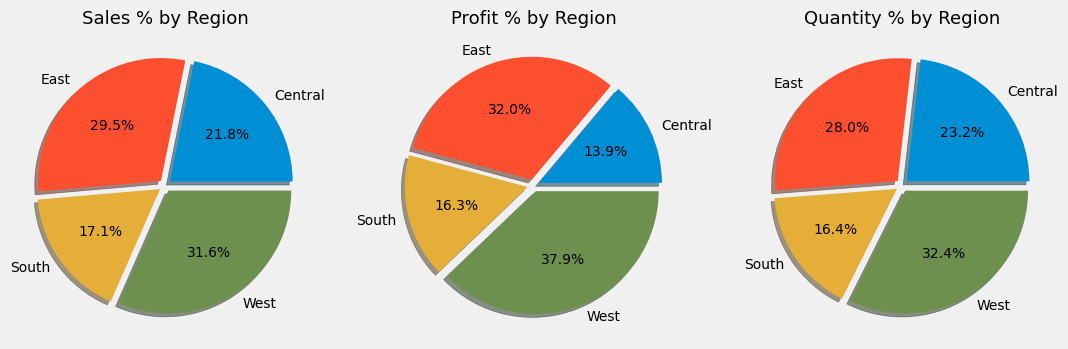

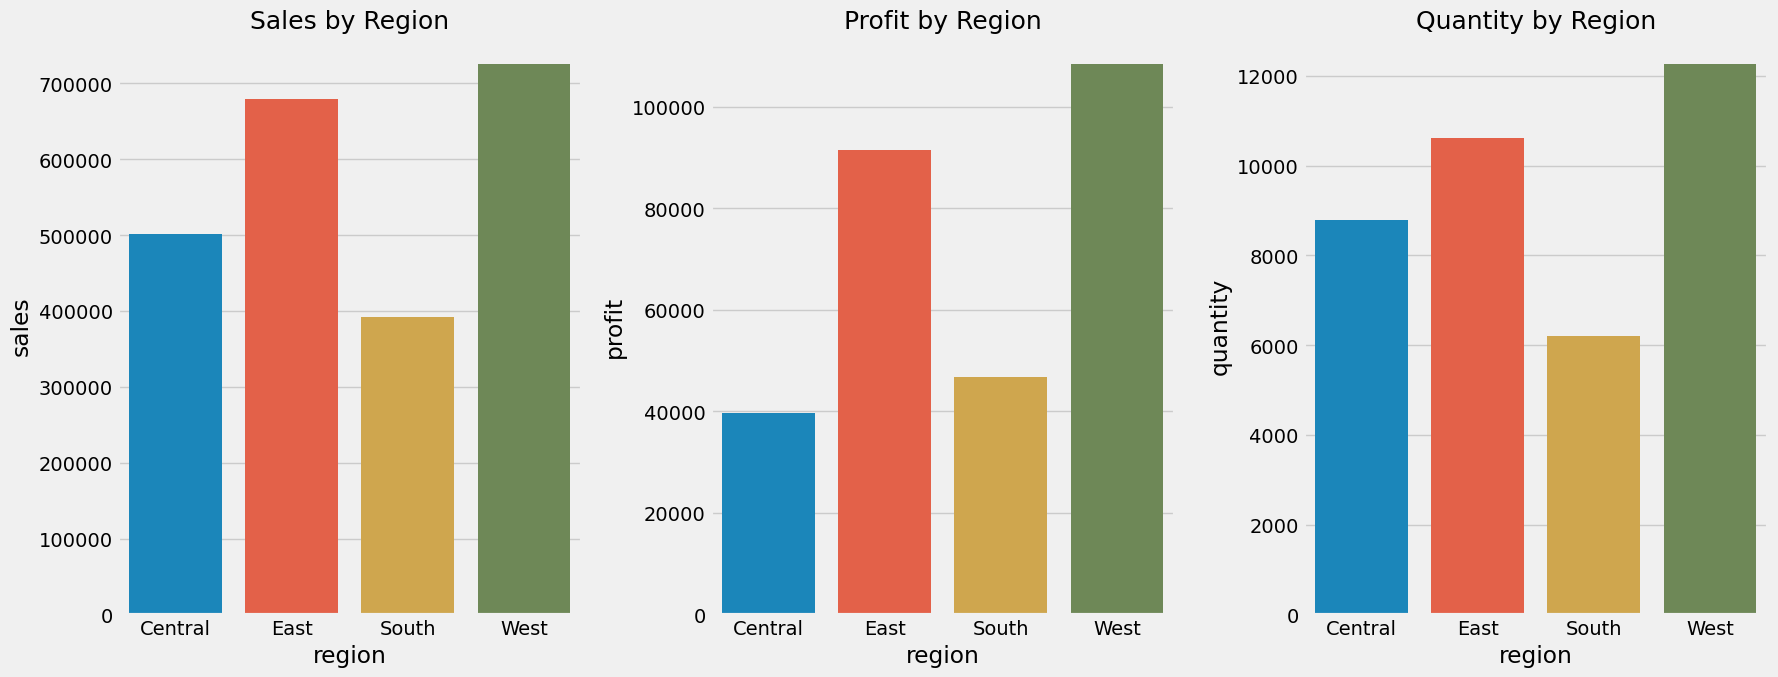

In [37]:
fig = plt.figure(figsize=(12,10))
ax = plt.subplot2grid((1,3),(0,0))
plt.pie(data=r_analysis, x='sales', labels='region', autopct='%.1f%%', shadow=True, 
        explode=[0.05, 0.05, 0.05, 0.05], textprops={'fontsize': 10})       
plt.title('Sales % by Region', fontsize=13)

#first row sec column
ax = plt.subplot2grid((1,3), (0, 1))
plt.pie(data=r_analysis, x='profit', labels='region',autopct='%.1f%%', shadow=True, 
        explode=[0.05, 0.05, 0.05, 0.05], textprops={'fontsize': 10} )
plt.title('Profit % by Region', fontsize=13)

ax = plt.subplot2grid((1,3), (0, 2))
plt.pie(data=r_analysis, x='quantity', labels='region',autopct='%.1f%%', shadow=True, 
        explode=[0.05, 0.05, 0.05, 0.05], textprops={'fontsize': 10} )
plt.title('Quantity % by Region', fontsize=13)

figure, axis = plt.subplots(1, 3, figsize=(18, 7))
# Seaborn palette setting

# Plot barplots
sns.barplot(data=r_analysis, x='region', y='sales', ax=axis[0])
axis[0].set_title('Sales by Region', fontsize=18)

sns.barplot(data=r_analysis, x='region', y='profit', ax=axis[1])
axis[1].set_title('Profit by Region', fontsize=18)

sns.barplot(data=r_analysis, x='region', y='quantity', ax=axis[2])
axis[2].set_title('Quantity by Region', fontsize=18)

plt.tight_layout()

### Observation
- In terms of sales, profit, and quantity, the West and East regions are performing well.

In [38]:
rc_analysis=superstore.groupby(['region', 'category'])[['sales', 'profit']].sum().round(2).reset_index()
print(pd.pivot_table(rc_analysis.iloc[:, 0:3], index='region', columns='category'))
print(pd.pivot_table(rc_analysis.iloc[:, [0, 1, 3]], index='region', columns='category'))

              sales                           
category  Furniture Office Supplies Technology
region                                        
Central   163797.16       167026.42  170416.31
East      208291.20       205516.06  264973.98
South     117298.68       125651.31  148771.91
West      252612.74       220853.25  251991.83
            profit                           
category Furniture Office Supplies Technology
region                                       
Central   -2871.05         8879.98   33697.43
East       3046.17        41014.58   47462.04
South      6771.21        19986.39   19991.83
West      11504.95        52609.85   44303.65


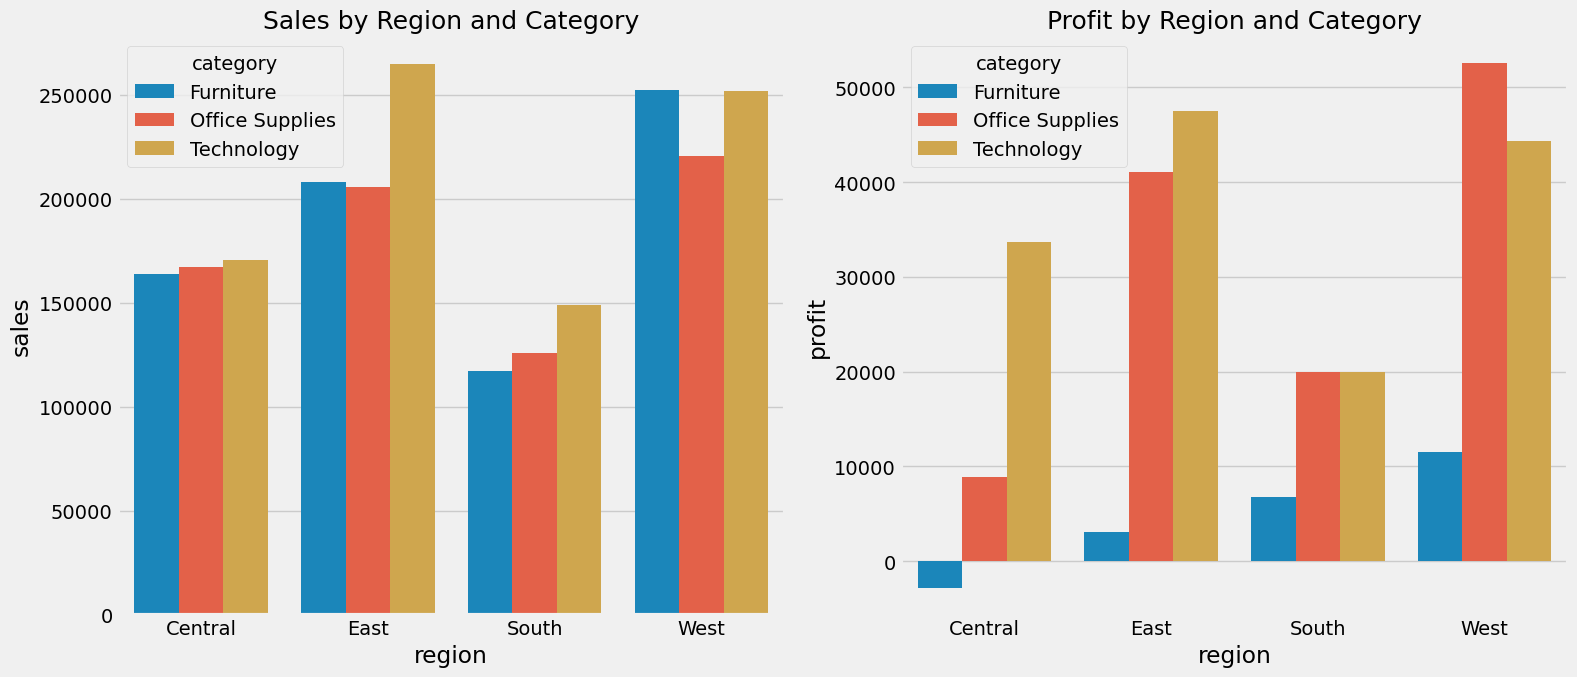

In [39]:
figure, axis = plt.subplots(1, 2, figsize=(16, 7))
sns.barplot(rc_analysis, x='region', y='sales', hue='category', ax=axis[0])
axis[0].set_title('Sales by Region and Category', fontsize=18)

sns.barplot(rc_analysis, x='region', y='profit', hue='category', ax=axis[1])
axis[1].set_title('Profit by Region and Category', fontsize=18)

plt.tight_layout()

### Observation
- In the Central region, sales in all three categories are almost equal. However, the Central region has the lowest profit from Office Supplies compared to other regions, while Furniture made a loss.
- The South region has lower sales in all three categories compared to other regions.
- Technology earned the higest profit in the East region, followed by West, Central, and South.
- Office Supplies earned the highest profit in the West region, followed by East, South, and Central.

In [40]:
rs_analysis=superstore.groupby(['region', 'segment'])[['sales', 'profit']].sum().round(2).reset_index()
print(pd.pivot_table(rs_analysis.iloc[:, 0:3], index='region', columns='segment'))
print(pd.pivot_table(rs_analysis.iloc[:, [0, 1, 3]], index='region', columns='segment'))

             sales                       
segment   Consumer  Corporate Home Office
region                                   
Central  252031.43  157995.81    91212.64
East     350908.17  200409.35   127463.73
South    195580.97  121885.93    74255.00
West     362880.77  225855.27   136721.78
           profit                      
segment  Consumer Corporate Home Office
region                                 
Central   8564.05  18703.90    12438.41
East     41190.98  23622.58    26709.22
South    26913.57  15215.22     4620.63
West     57450.60  34437.43    16530.41


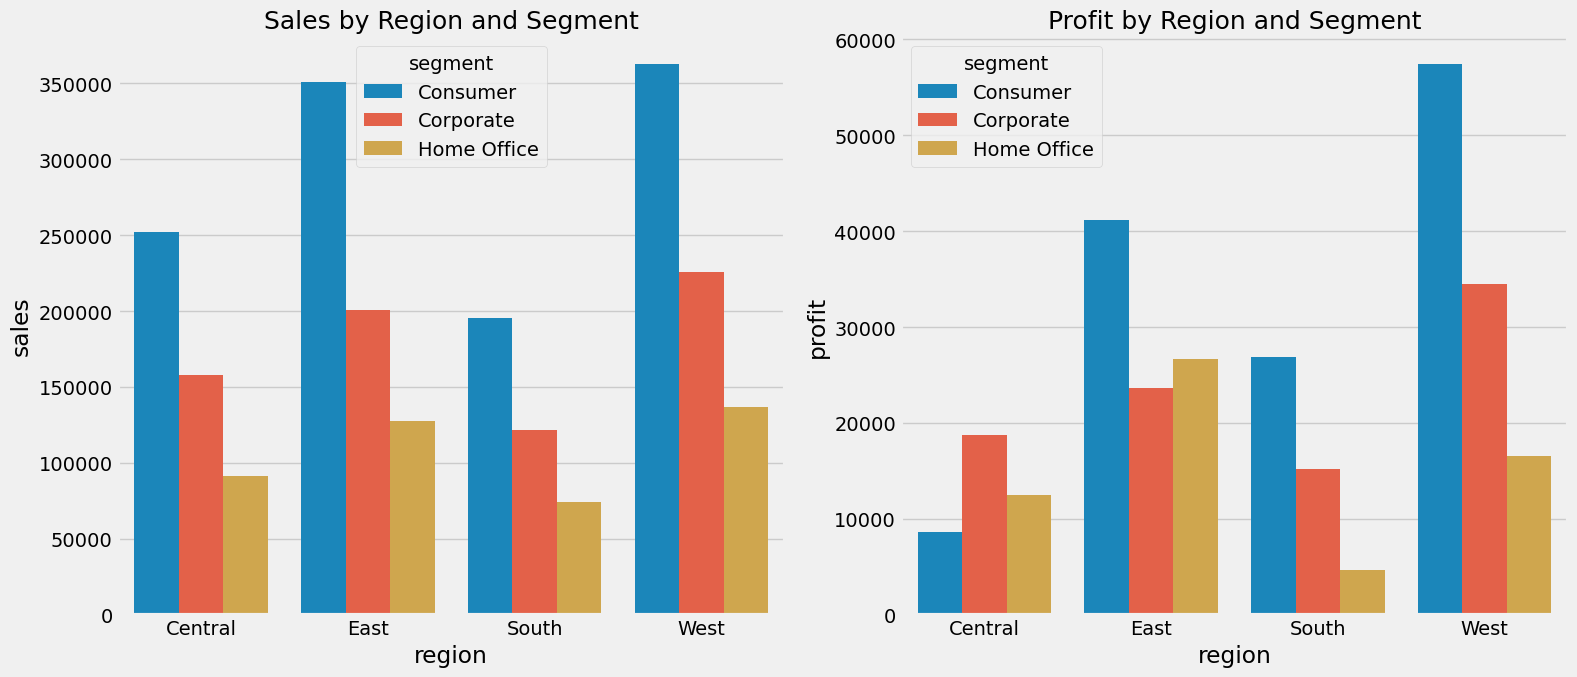

In [41]:
figure, axis = plt.subplots(1, 2, figsize=(16, 7))

sns.barplot(rs_analysis, x='region', y='sales', hue='segment', ax=axis[0])
axis[0].set_title('Sales by Region and Segment', fontsize=18)

sns.barplot(rs_analysis, x='region', y='profit', hue='segment', ax=axis[1])
axis[1].set_title('Profit by Region and Segment', fontsize=18)

plt.tight_layout()

### Observation
- In every region, the Consumer segment has the highest sales.
- The Consumer segment earned the highest profit in the West region, while the lowest profit is earned in the Central region.

In [42]:
orders_region = superstore.groupby('region').agg(no_of_orders=('order_id', 'count')).reset_index()
orders_region

,region,no_of_orders
0,Central,2323
1,East,2848
2,South,1620
3,West,3203


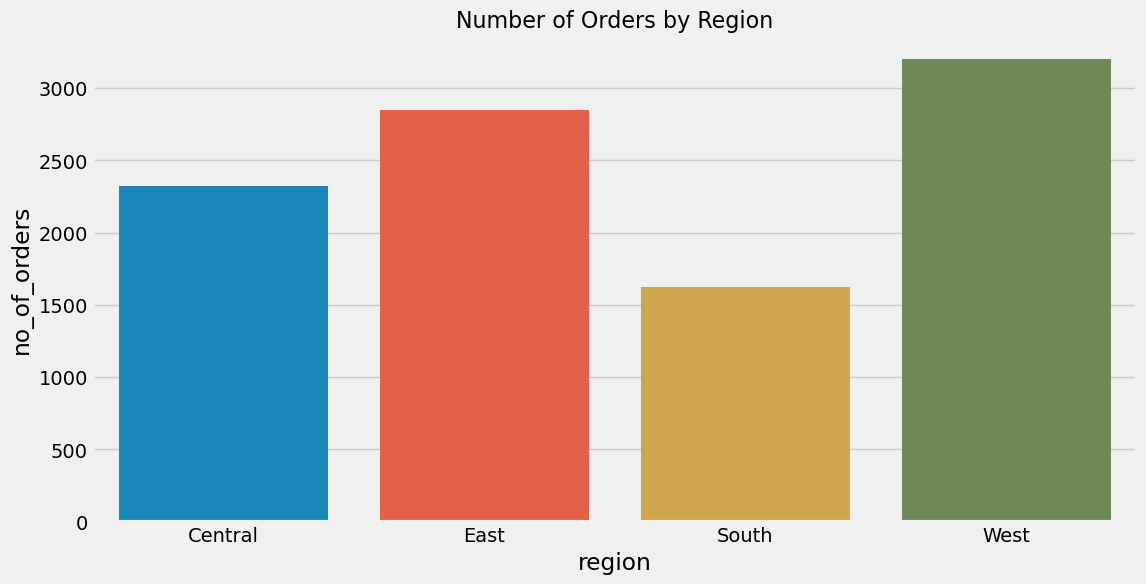

In [43]:
plt.figure(figsize=(12, 6))
sns.barplot(orders_region, x='region', y='no_of_orders')
plt.title('Number of Orders by Region', fontsize=16)
plt.show()

### Observation
- The West region received the highest number of orders, followed by the East, Central, and South.

In [44]:
city_analysis = superstore.groupby('city')[['sales', 'profit']].sum().reset_index()
top10c_sales = city_analysis.sort_values(by='sales', ascending=False).iloc[0:10]
top10c_profit = city_analysis.sort_values(by='profit', ascending=False).iloc[0:10]

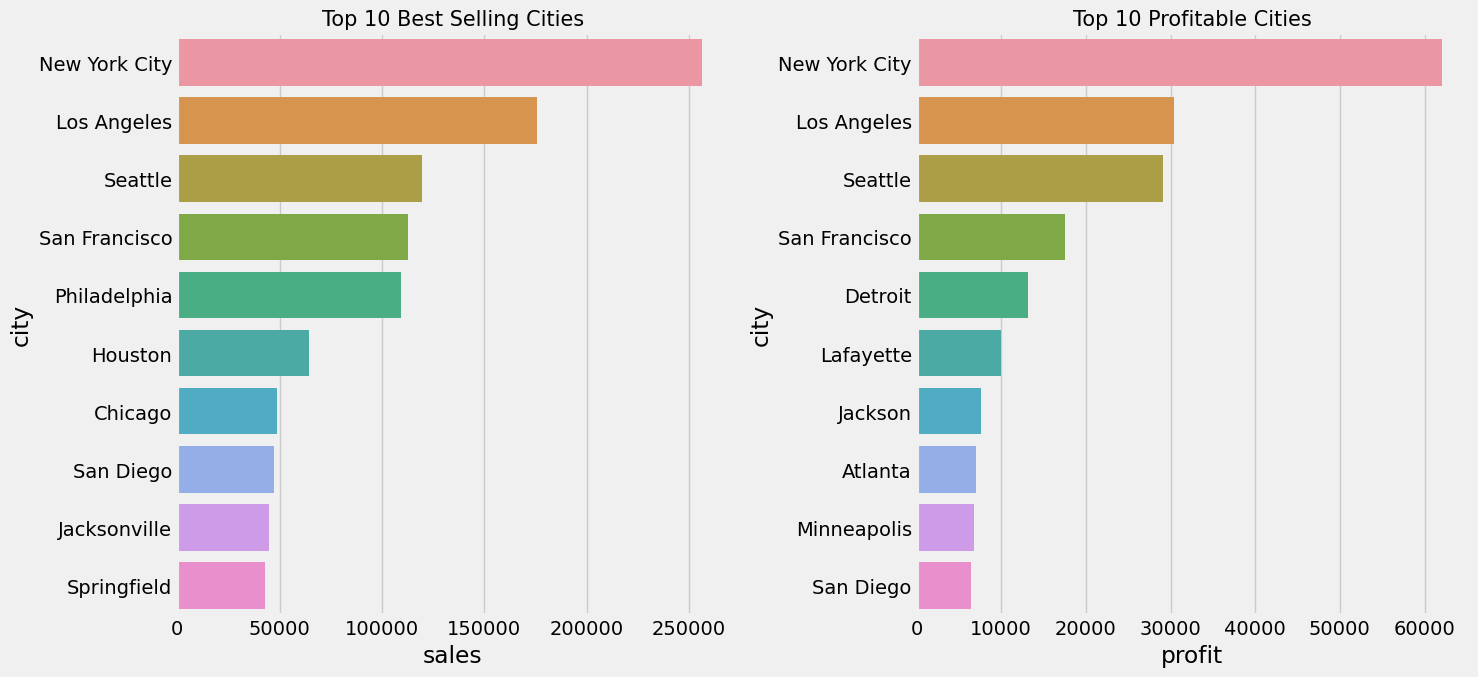

In [45]:
figure, axis = plt.subplots(1, 2, figsize=(15, 7))
sns.barplot(top10c_sales, x='sales', y='city',  ax=axis[0])
axis[0].set_title('Top 10 Best Selling Cities', fontsize=15)

sns.barplot(top10c_profit, x='profit', y='city',  ax=axis[1])
axis[1].set_title('Top 10 Profitable Cities', fontsize=15)
plt.tight_layout()

In [46]:
state_analysis = superstore.groupby('state')[['sales', 'profit']].sum().reset_index()
top10s_sales = state_analysis.sort_values(by='sales', ascending=False)
top10s_profit = state_analysis.sort_values(by='profit', ascending=False)

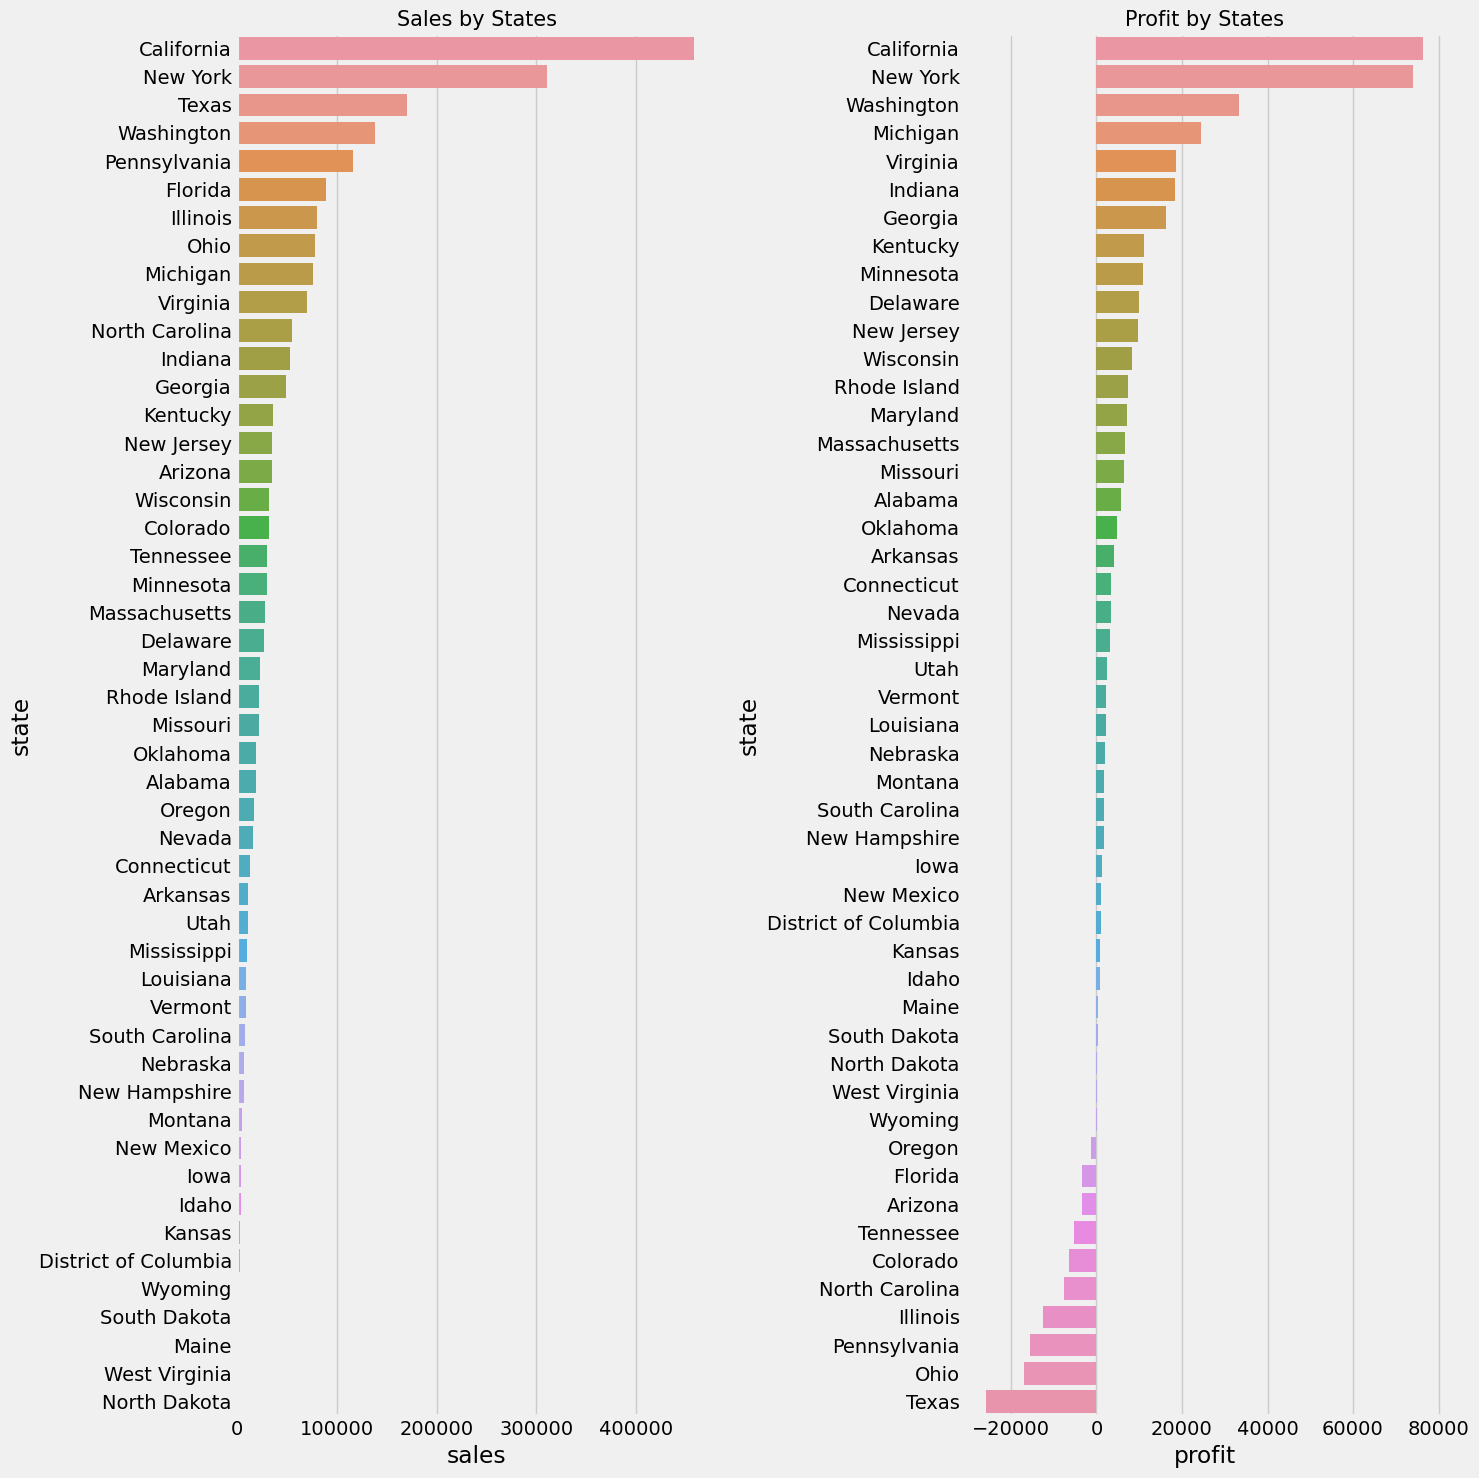

In [47]:
figure, axis = plt.subplots(1, 2, figsize=(15, 15))
sns.barplot(top10s_sales, x='sales', y='state',  ax=axis[0])
axis[0].set_title('Sales by States', fontsize=15)

sns.barplot(top10s_profit, x='profit', y='state',  ax=axis[1])
axis[1].set_title('Profit by States', fontsize=15)
plt.tight_layout()

### Observation
- California and New York are the top 2 best selling and most profitable states.
- Although Texas ranks third among the states with the highest sales, It ranks first among the states in terms of losses.
-  Despite being the best selling states, Ohio, Pennsylvania, and Illinois come under top 5 loss making states.

## 10. Customer Analysis

In [65]:
customer_analysis = superstore.groupby('customer_name')[['sales', 'profit']].sum().reset_index()
top10cust_sales = customer_analysis.sort_values(by='sales', ascending=False).iloc[0:5]
top10cust_profit = customer_analysis.sort_values(by='profit', ascending=False).iloc[0:5]

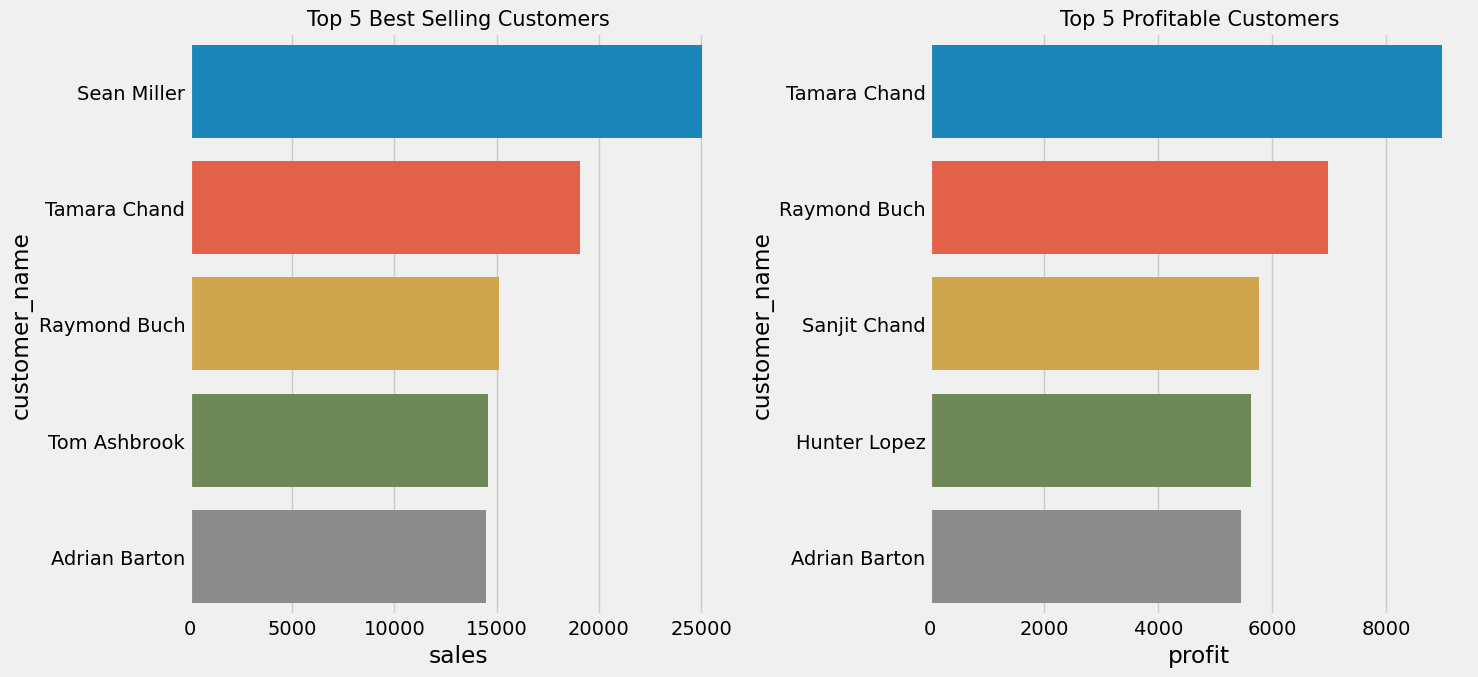

In [66]:
figure, axis = plt.subplots(1, 2, figsize=(15, 7))
sns.barplot(top10cust_sales, x='sales', y='customer_name',  ax=axis[0])
axis[0].set_title('Top 5 Best Selling Customers', fontsize=15)

sns.barplot(top10cust_profit, x='profit', y='customer_name',  ax=axis[1])
axis[1].set_title('Top 5 Profitable Customers', fontsize=15)
plt.tight_layout()

## 11. Shipping Mode Analysis

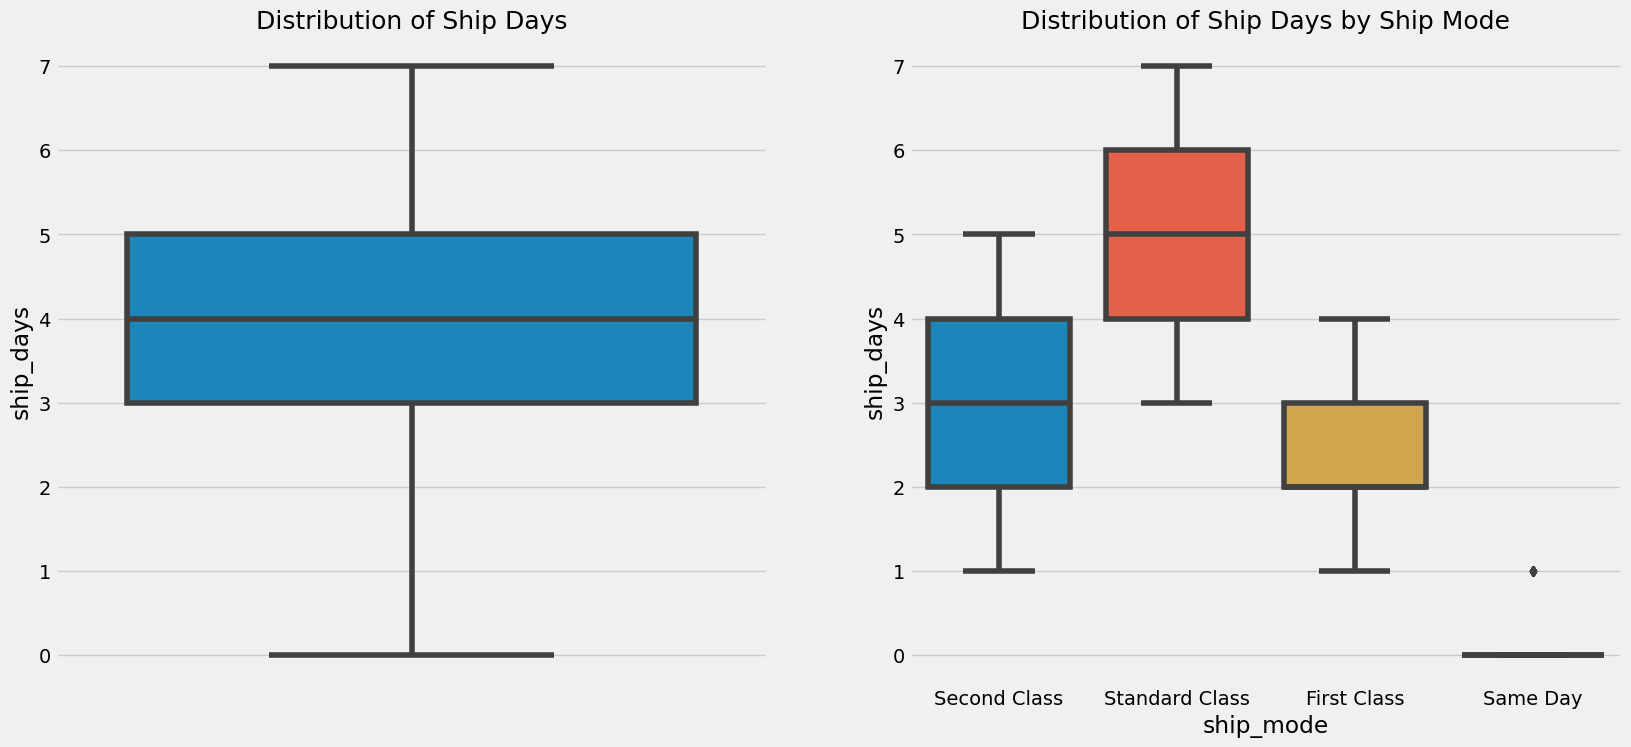

In [48]:
figure, axis = plt.subplots(1, 2, figsize=(18, 8))
sns.boxplot(superstore, y='ship_days', ax=axis[0])
axis[0].set_title('Distribution of Ship Days', fontsize=18)

sns.boxplot(superstore, x='ship_mode', y='ship_days', ax=axis[1])
axis[1].set_title('Distribution of Ship Days by Ship Mode', fontsize=18)
plt.show()

In [49]:
shipping_analysis=superstore.groupby('ship_mode').agg(no_of_orders=('order_id', 'count')).reset_index()
shipping_analysis

,ship_mode,no_of_orders
0,First Class,1538
1,Same Day,543
2,Second Class,1945
3,Standard Class,5968


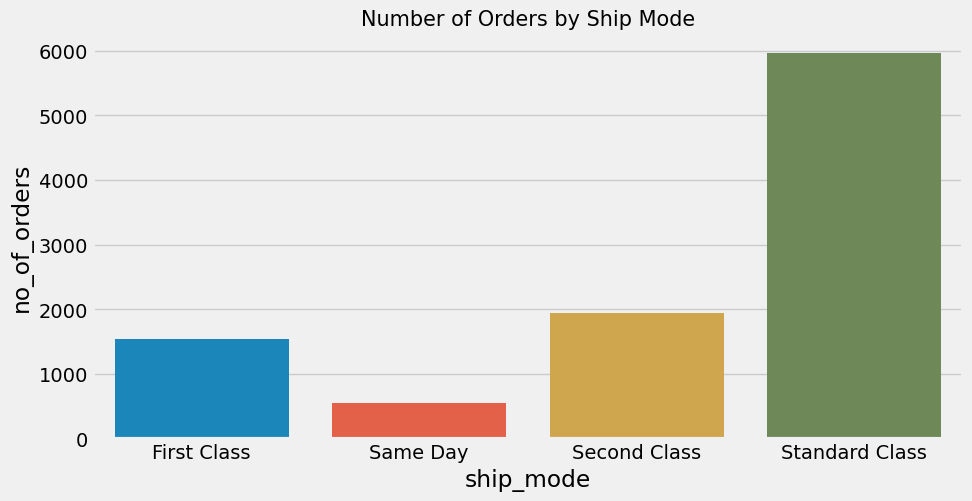

In [50]:
plt.figure(figsize=(10, 5))
sns.barplot(shipping_analysis, x='ship_mode', y='no_of_orders')
plt.title('Number of Orders by Ship Mode', fontsize=15)
plt.show()

### Observation
- The Majority of customers prefer the Standard Class shipping mode.

## 12. Findings and Recommendations
- Every year, the highest sales are recorded in the fourth quarter. In order to maximize sales and profit in the fourth quarter, deploy and manage all resources efficiently and effectively, including inventory, sales personnel, finance, and promotion campaigns.
- In California and New York, Superstore earned more than 50% of its total profit. Therefore, it is crucial for Superstore to retain customers and continue sales in these two states.
- Concentrate on the most profitable sub-categories of technology, such as Copiers, Phones, and Accessories, as well as of Office Supplies, such as paper, and binders. 
- Tables, Bookcases, and Supplies suffered losses. So, switch suppliers and bargain for cheaper prices for these loss-making products while considering the customers' needs and wants.
- Focus on the consumer segment since it contributes almost 50% in terms of sales, profit, and sales quantity.
- Stop selling in the loss-making states. It's important to note that some of the states where Superstore made the majority of its sales actually lowered the profit earned by Superstore.